# Model

\begin{align}
\dfrac{dC}{dt}&= p - dC - \left(\dfrac{a_SCS}{1+a_Sh_SC+a_Sh_SF}\right) - \left(\dfrac{a_TCT}{1+a_Th_TC+a_Th_TO}\right) \\
\dfrac{dF}{dt}&= r_FF\left(1-\dfrac{F}{K_F}\right) - \left(\dfrac{a_SFS}{1+a_Sh_SC+a_Sh_SF}\right) \\
\dfrac{dT}{dt}&= \left(\dfrac{a_T(S)CT + a_TOT}{1+a_T(S)h_TC+a_Th_TO}\right) - m_TT - q_TT^2 \\
\dfrac{dS}{dt}&= \left(\dfrac{a_S(T)CS + a_SFS}{1+a_S(T)h_SC+a_Sh_SF}\right) - m_SS - q_SS^2
\end{align}

with $a_T(S)$ and $a_S(T)$ either

\begin{align*}
a_T(S)=\lambda_T\exp{(-\alpha S)} \\
a_S(T)=\lambda_S\exp{(-\beta T)}
\end{align*}

or

\begin{align*}
a_T(S)=a_T \\
a_S(T)=a_S
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp  # to solve ODE system
from SALib.sample.morris import sample as ee_sample
from tqdm import tqdm

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork') #grade3

In [2]:
seed = 1234
step = 4000
time_list = np.linspace(0, 200, step)
num_of_points = 1000
method = "LSODA"

# Main analyses

# Exponential Density-Mediated Interaction

## Parameter values

lambda_T=0.1
lambda_S=1
alpha=0.1
beta=1
p=10
d=1
a_S=1
h_S=1
a_T=10
h_T=0.1
O=0.07
r_F=1
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([0.0617073, 0.302595, 49.0135, 1.32302]) 

In [3]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [4]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [5]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


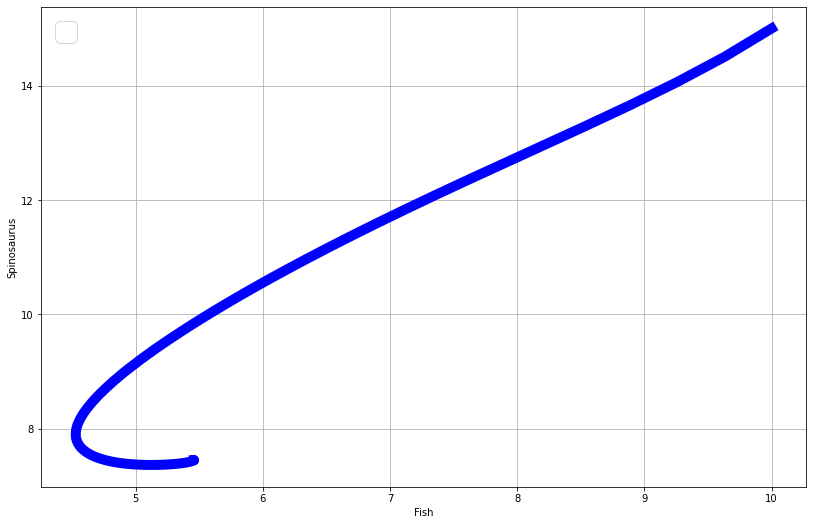

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


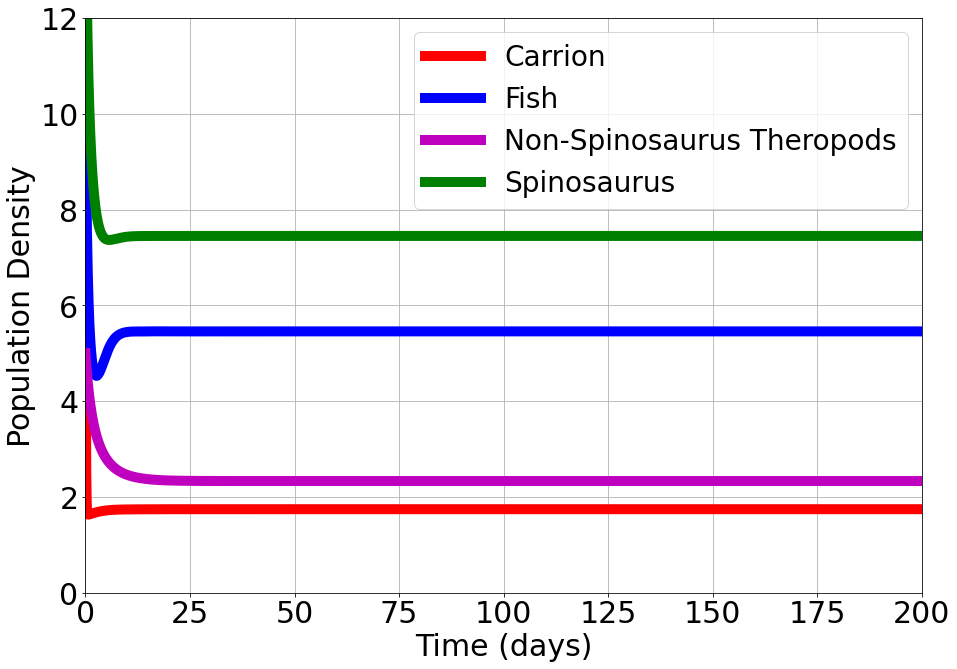

In [7]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

## Sensitivity analysis

### Least-Squares objective function

In [8]:
from SALib.sample.morris import sample as ee_sample

mean_values_params = [
    lambda_T,
    lambda_S,
    alpha,
    beta,
    p,
    d,
    a_S,
    h_S,
    a_T,
    h_T,
    O,
    r_F,
    K_F,
    m_T,
    q_T,
    m_S,
    q_S,
]
factors_names = [
    r"$\lambda_T$",
    r"$\lambda_S$",
    r"$\alpha$",
    r"$\beta$",
    r"$p$",
    r"$d$",
    r"$a_S$",
    r"$h_S$",
    r"$a_T$",
    r"$h_T$",
    r"$O$",
    r"$r_F$",
    r"$K_F$",
    r"$m_T$",
    r"$q_T$",
    r"$m_S$",
    r"$q_S$",
]
params_perturbations = 0.5
problem_info = {
    'num_vars': len(mean_values_params),
    'names': factors_names,
    'bounds': [[param - params_perturbations * param, param + params_perturbations * param] for param in mean_values_params]
}

grid_level = 4
num_of_trajectories = 20
parameter_values = ee_sample(problem_info, grid_level, num_of_trajectories, local_optimization=False, seed=seed)

### Spinosaurus

In [9]:
from tqdm import tqdm

time_list_range = time_list

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_exponential_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Spinosaurus_realization

100%|██████████| 72/72 [00:00<00:00, 159.49it/s]


In [10]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

100%|██████████| 4000/4000 [00:19<00:00, 202.52it/s]


,time_list,$\lambda_T$,$\lambda_S$,$\alpha$,$\beta$,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.0,0.0,0.0,0.0,0.00011,0.000877,0.057643,0.346609,0.000004,0.000029,0.000001,0.000259,0.002649,0.000001,0.000001,0.036988,0.55483
1,0.100025,0.0,0.0,0.0,0.0,0.000159,0.000437,0.059559,0.341832,0.000003,0.000036,0.000001,0.000492,0.005198,0.0,0.000001,0.036965,0.555316
2,0.150038,0.0,0.0,0.0,0.0,0.000332,0.000612,0.06134,0.336596,0.000005,0.000067,0.000003,0.000729,0.007749,0.000001,0.000002,0.036949,0.555615
3,0.200050,0.0,0.0,0.0,0.0,0.000713,0.000865,0.062958,0.330942,0.000008,0.000126,0.000006,0.000979,0.010322,0.0,0.000001,0.036943,0.556138
4,0.250063,0.0,0.0,0.0,0.0,0.001315,0.001148,0.064396,0.325058,0.000012,0.000208,0.000009,0.00124,0.012942,0.0,0.000002,0.03696,0.556711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.000177,0.0,0.000022,0.0,0.118094,0.099232,0.060109,0.106152,0.003328,0.008349,0.007251,0.243942,0.102641,0.005016,0.011707,0.052649,0.181329
3995,199.849962,0.000177,0.0,0.000022,0.0,0.118091,0.098559,0.060122,0.106151,0.003328,0.008349,0.00725,0.243934,0.10264,0.004874,0.011707,0.052648,0.182147
3996,199.899975,0.000177,0.0,0.000023,0.0,0.118088,0.097894,0.060134,0.10615,0.003328,0.008348,0.00725,0.243926,0.102639,0.004728,0.011706,0.052648,0.18296
3997,199.949987,0.000177,0.0,0.000023,0.0,0.118085,0.097238,0.060146,0.10615,0.003328,0.008348,0.007249,0.243918,0.102639,0.004579,0.011706,0.052648,0.183768


In [11]:
df_sigmai

,time_list,$\lambda_T$,$\lambda_S$,$\alpha$,$\beta$,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.0,0.0,0.0,0.0,0.000711,0.003814,0.116922,0.710441,0.000012,0.00022,0.000004,0.002079,0.005776,0.000005,0.000008,0.006006,0.154003
1,0.100025,0.0,0.0,0.0,0.0,0.00039,0.001041,0.112031,0.606328,0.000007,0.000118,0.000007,0.003499,0.009736,0.000001,0.000008,0.010106,0.256727
2,0.150038,0.0,0.0,0.0,0.0,0.001101,0.000544,0.108008,0.524194,0.000013,0.000284,0.000018,0.004639,0.012785,0.000004,0.000011,0.01304,0.335359
3,0.200050,0.0,0.0,0.0,0.0,0.002535,0.000942,0.104903,0.459198,0.000022,0.000547,0.000032,0.005529,0.015508,0.000001,0.000003,0.01527,0.395511
4,0.250063,0.0,0.0,0.0,0.0,0.004708,0.001507,0.102345,0.406715,0.000034,0.000898,0.00005,0.006289,0.018233,0.000001,0.000003,0.017021,0.442197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.000338,0.0,0.000022,0.0,0.093571,0.101614,0.068392,0.158996,0.004637,0.008322,0.008621,0.222294,0.086397,0.008333,0.007559,0.047284,0.18362
3995,199.849962,0.000339,0.0,0.000022,0.0,0.093751,0.100842,0.068541,0.159301,0.004645,0.008338,0.008637,0.22271,0.086563,0.00807,0.007574,0.047374,0.183293
3996,199.899975,0.000339,0.0,0.000022,0.0,0.093929,0.100086,0.068688,0.159602,0.004654,0.008354,0.008653,0.223121,0.086726,0.007798,0.007588,0.047464,0.182976
3997,199.949987,0.00034,0.0,0.000022,0.0,0.094104,0.099346,0.068833,0.159899,0.004663,0.008369,0.008669,0.223526,0.086888,0.007518,0.007603,0.047552,0.182668


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


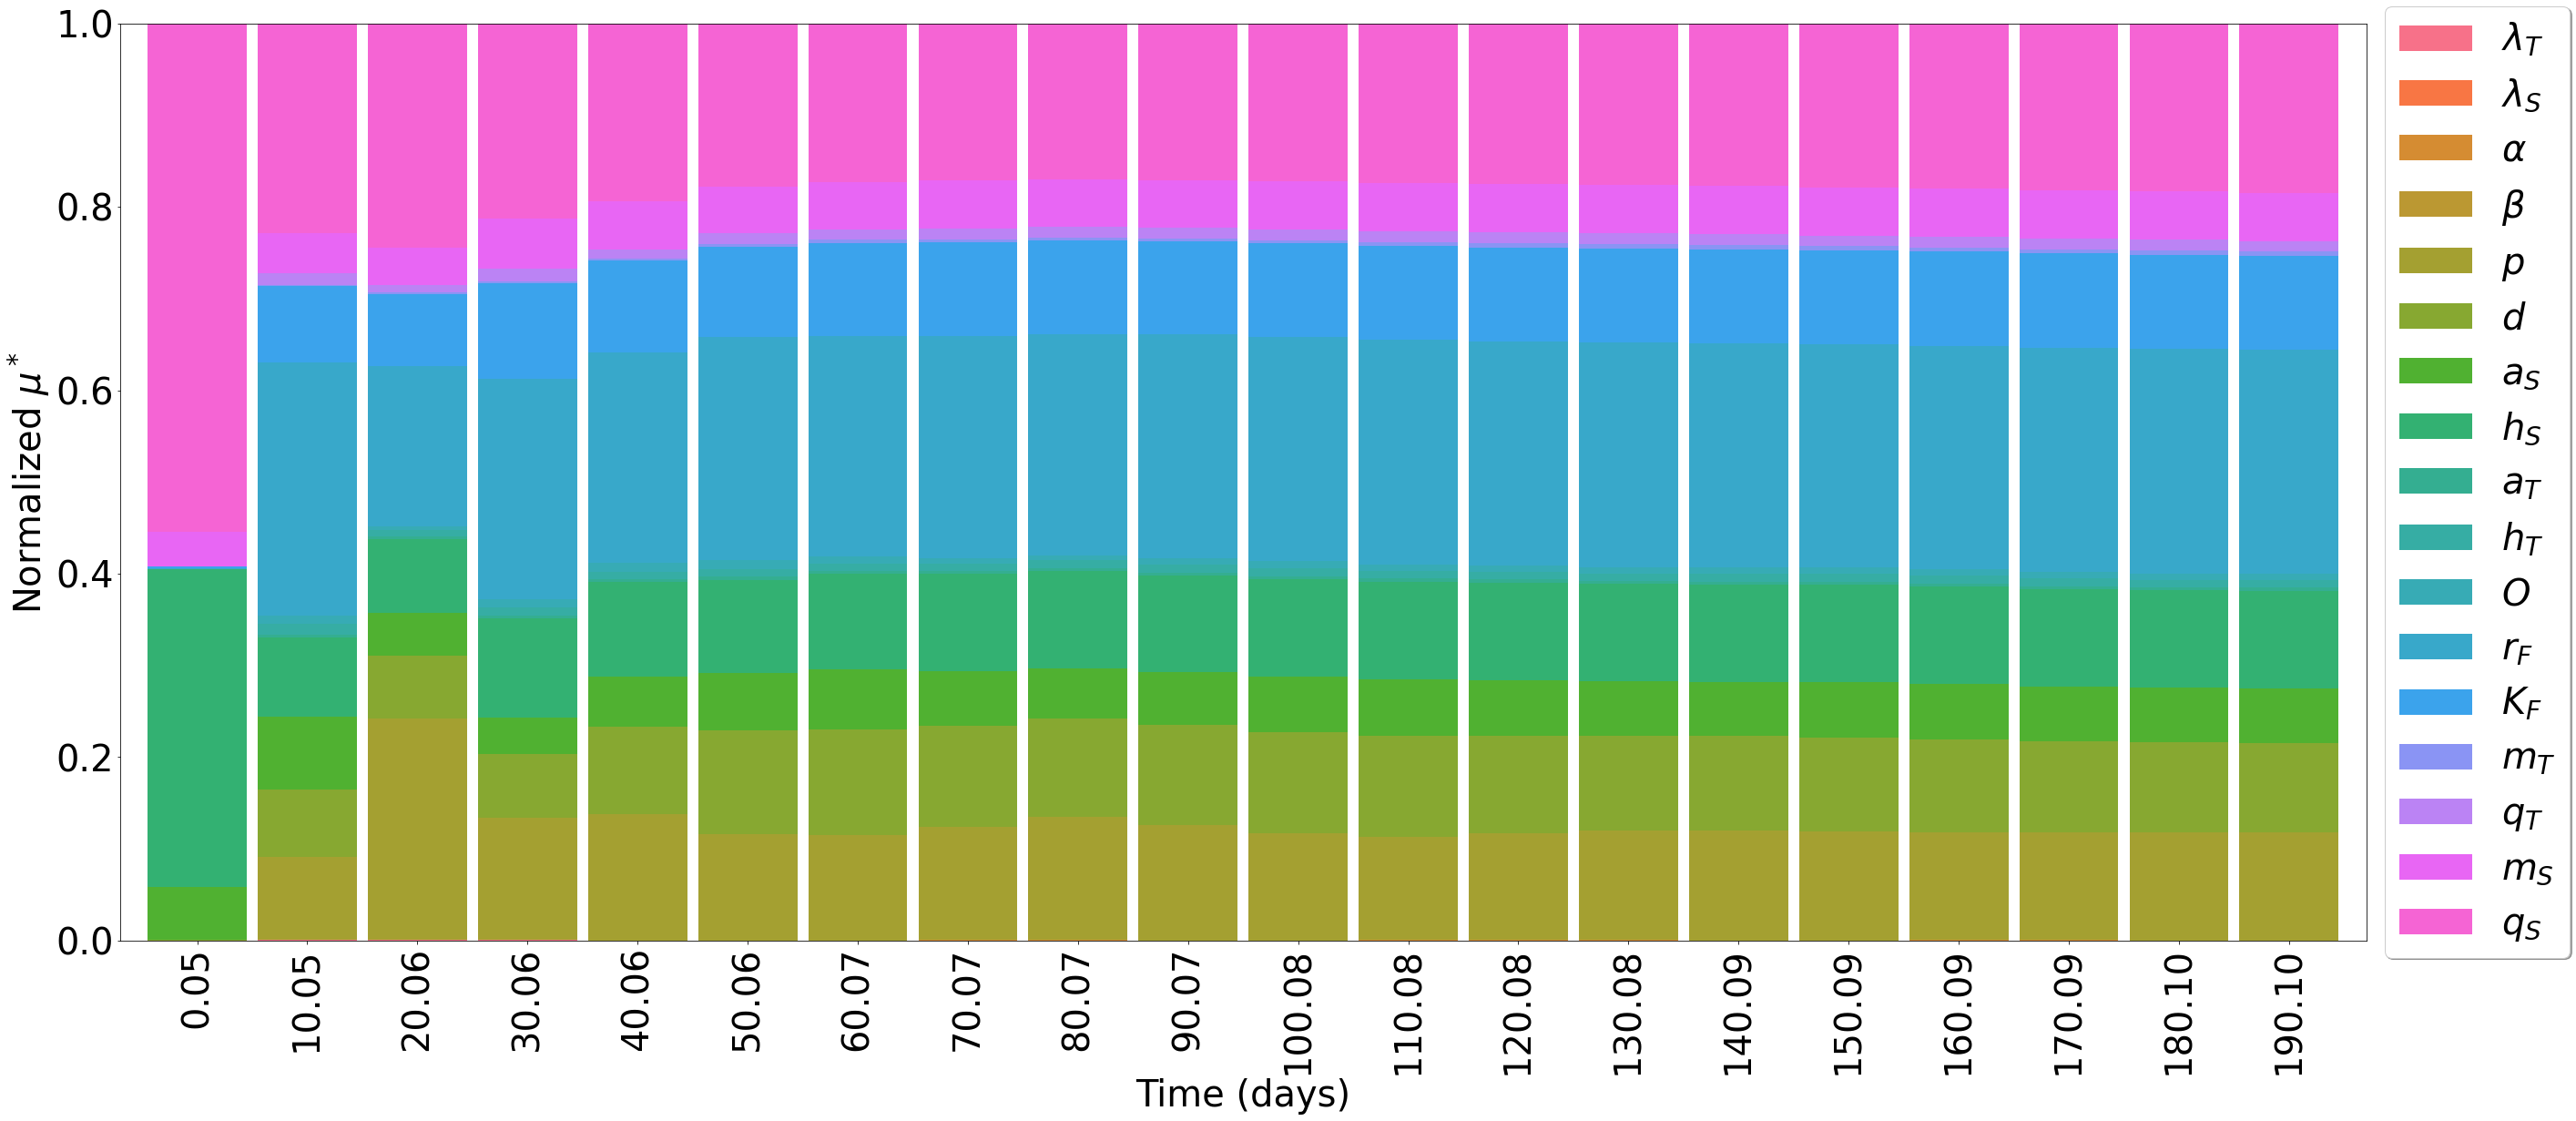

In [12]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)
#ncol = len(problem_info['names'])

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Spinosaurus_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


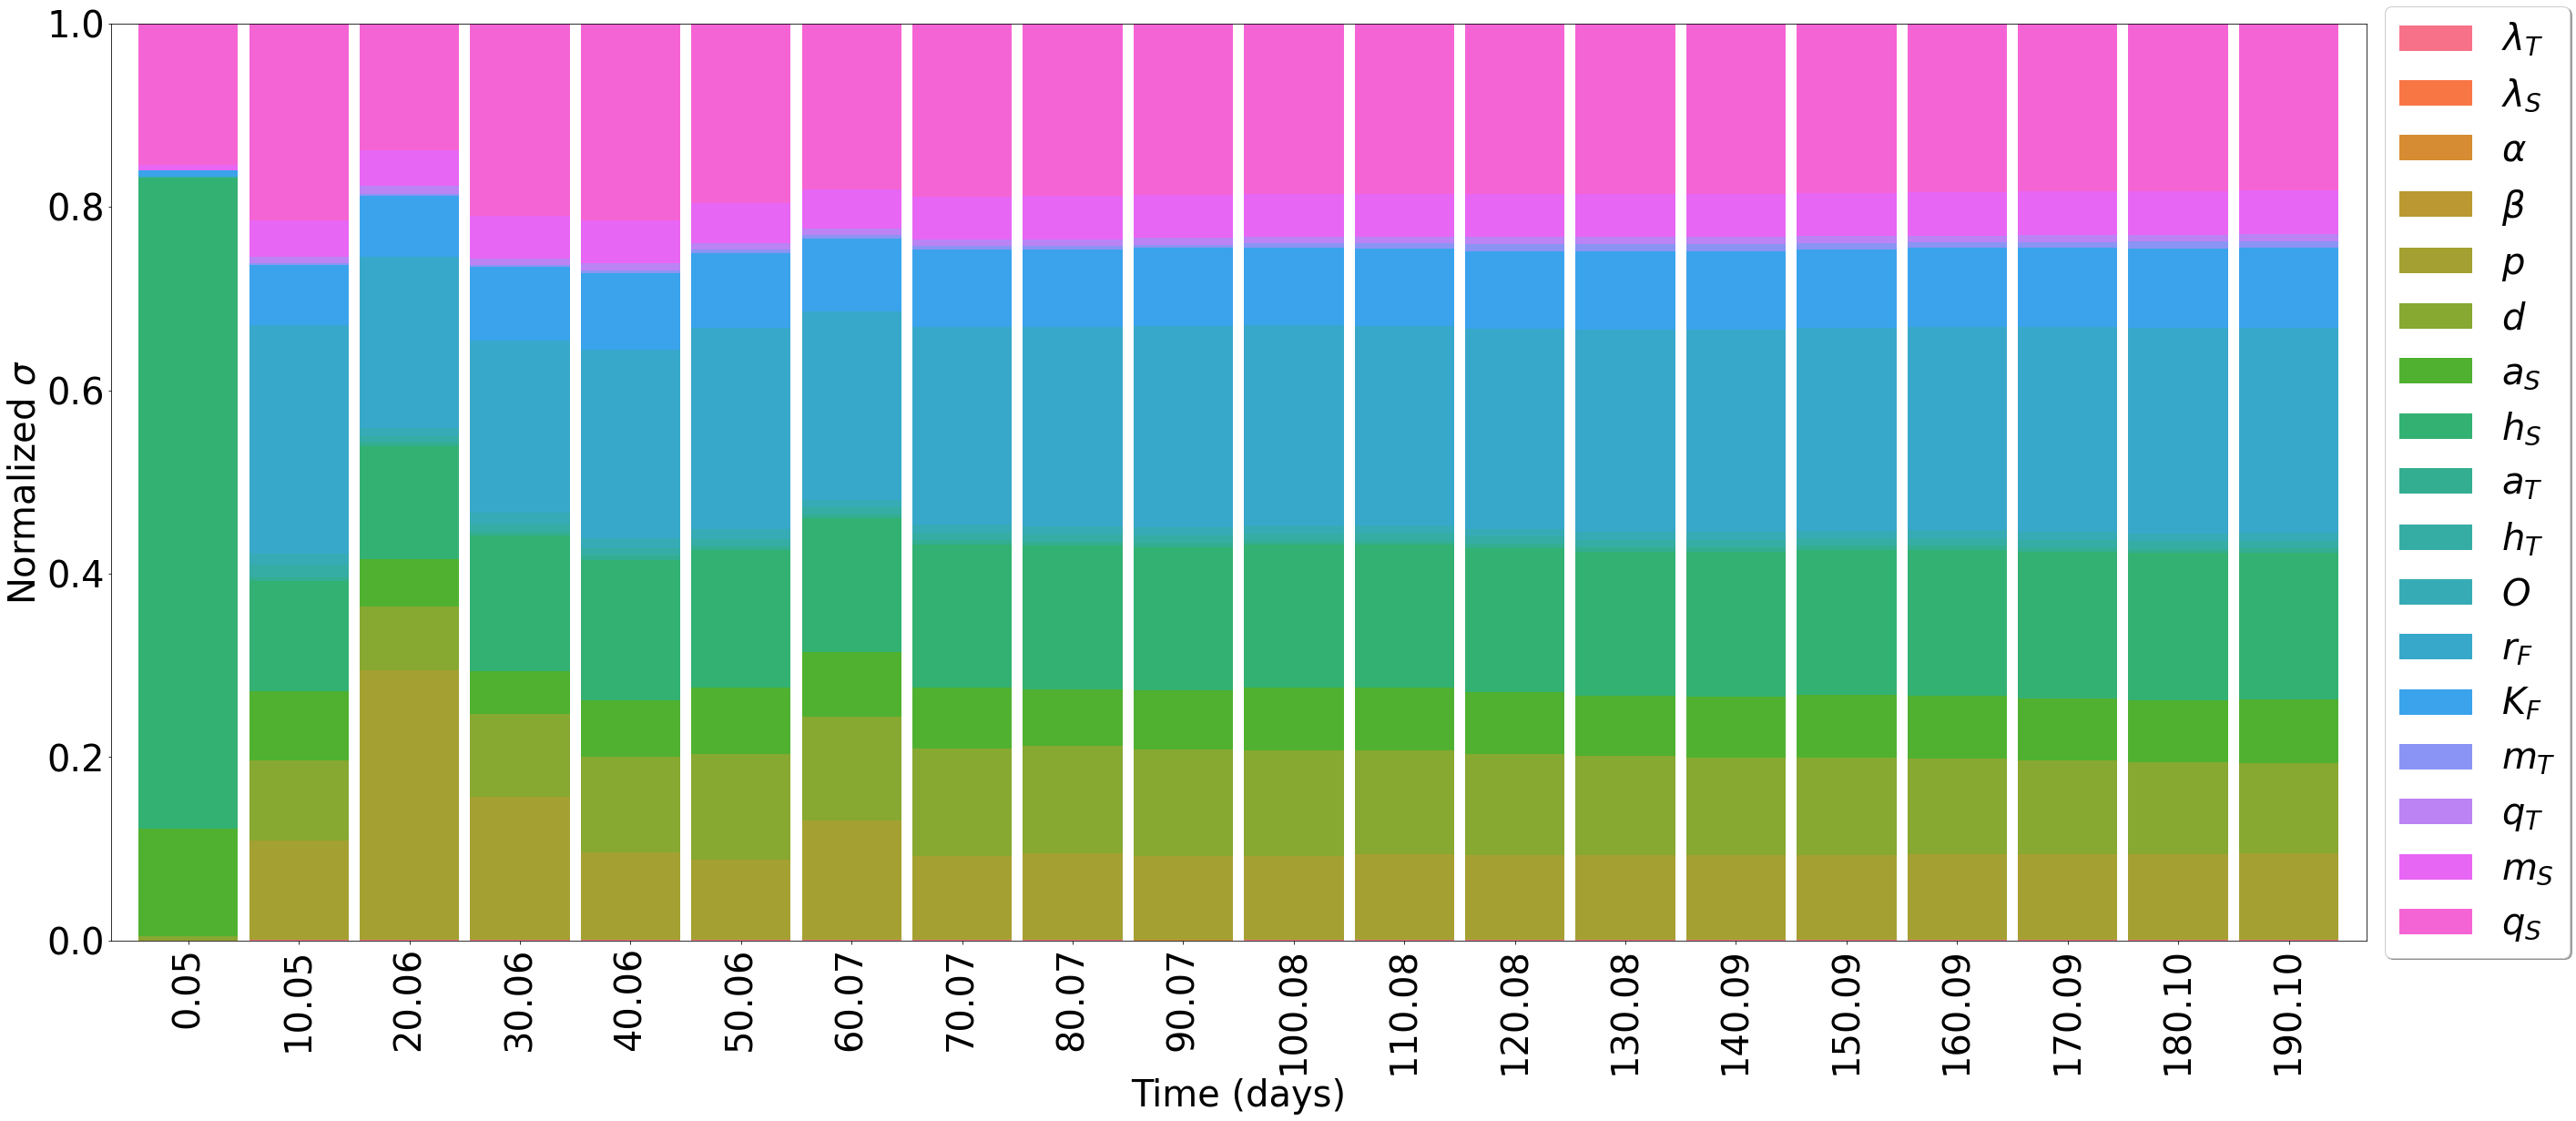

In [13]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Spinosaurus_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

### Non-Spinosaurus Theropods

In [14]:
from tqdm import tqdm

time_list_range = time_list

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_exponential_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Other_Theropods_realization

100%|██████████| 72/72 [00:00<00:00, 172.86it/s]


In [15]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

100%|██████████| 4000/4000 [00:19<00:00, 209.07it/s]


,time_list,$\lambda_T$,$\lambda_S$,$\alpha$,$\beta$,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.000002,0.0,0.000009,0.0,0.000117,0.0003,0.000001,0.000042,0.187069,0.085814,0.227335,0.0,0.0,0.082869,0.416441,0.0,0.000002
1,0.100025,0.000002,0.0,0.000009,0.0,0.000057,0.000126,0.000001,0.000021,0.186276,0.085443,0.229152,0.0,0.0,0.082481,0.416431,0.0,0.000001
2,0.150038,0.000001,0.0,0.000008,0.0,0.000035,0.00009,0.000001,0.000011,0.185473,0.085075,0.230948,0.0,0.0,0.082089,0.416265,0.0,0.000003
3,0.200050,0.000001,0.0,0.000007,0.0,0.000027,0.000069,0.0,0.00001,0.184694,0.084721,0.232714,0.0,0.0,0.081707,0.416047,0.0,0.000002
4,0.250063,0.000001,0.0,0.000007,0.0,0.000022,0.000055,0.000001,0.000009,0.18394,0.084388,0.23445,0.0,0.0,0.081338,0.415787,0.0,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.005252,0.0,0.001196,0.0,0.002321,0.000836,0.003786,0.009514,0.173135,0.095766,0.310286,0.0008,0.001034,0.076736,0.316839,0.000252,0.002248
3995,199.849962,0.005252,0.0,0.001196,0.0,0.002321,0.000835,0.003786,0.009514,0.173135,0.095766,0.310286,0.0008,0.001034,0.076736,0.316839,0.000252,0.002248
3996,199.899975,0.005252,0.0,0.001196,0.0,0.002321,0.000835,0.003787,0.009514,0.173135,0.095766,0.310286,0.0008,0.001034,0.076736,0.316839,0.000252,0.002249
3997,199.949987,0.005251,0.0,0.001196,0.0,0.00232,0.000835,0.003787,0.009514,0.173135,0.095766,0.310286,0.0008,0.001034,0.076735,0.316839,0.000252,0.002249


In [16]:
df_sigmai

,time_list,$\lambda_T$,$\lambda_S$,$\alpha$,$\beta$,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.000014,0.0,0.000047,0.0,0.000758,0.001597,0.000007,0.000332,0.422951,0.266642,0.280801,0.000001,0.0,0.003121,0.023724,0.0,0.000005
1,0.100025,0.000012,0.0,0.000039,0.0,0.00037,0.000578,0.000004,0.000167,0.406911,0.252426,0.288741,0.000001,0.000001,0.005834,0.044909,0.000001,0.000007
2,0.150038,0.000011,0.0,0.000033,0.0,0.000196,0.000423,0.000003,0.000078,0.392027,0.239473,0.295459,0.000002,0.0,0.008206,0.064082,0.000001,0.000006
3,0.200050,0.00001,0.0,0.000028,0.0,0.000152,0.000309,0.000003,0.000059,0.378456,0.227925,0.301455,0.0,0.0,0.010255,0.081339,0.000002,0.000008
4,0.250063,0.000009,0.0,0.000025,0.0,0.000115,0.000236,0.000003,0.000042,0.366073,0.217561,0.306868,0.0,0.0,0.012046,0.097011,0.000002,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.021239,0.0,0.002354,0.0,0.009161,0.002823,0.013788,0.038988,0.140385,0.096925,0.342974,0.002545,0.003891,0.013856,0.302064,0.000855,0.008152
3995,199.849962,0.021239,0.0,0.002354,0.0,0.009161,0.002823,0.013788,0.038988,0.140384,0.096925,0.342974,0.002545,0.003891,0.013856,0.302064,0.000855,0.008152
3996,199.899975,0.021239,0.0,0.002354,0.0,0.009161,0.002824,0.013788,0.038988,0.140384,0.096925,0.342974,0.002545,0.003891,0.013856,0.302064,0.000855,0.008152
3997,199.949987,0.021239,0.0,0.002354,0.0,0.00916,0.002824,0.013788,0.038988,0.140384,0.096925,0.342974,0.002545,0.003891,0.013856,0.302064,0.000855,0.008152


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


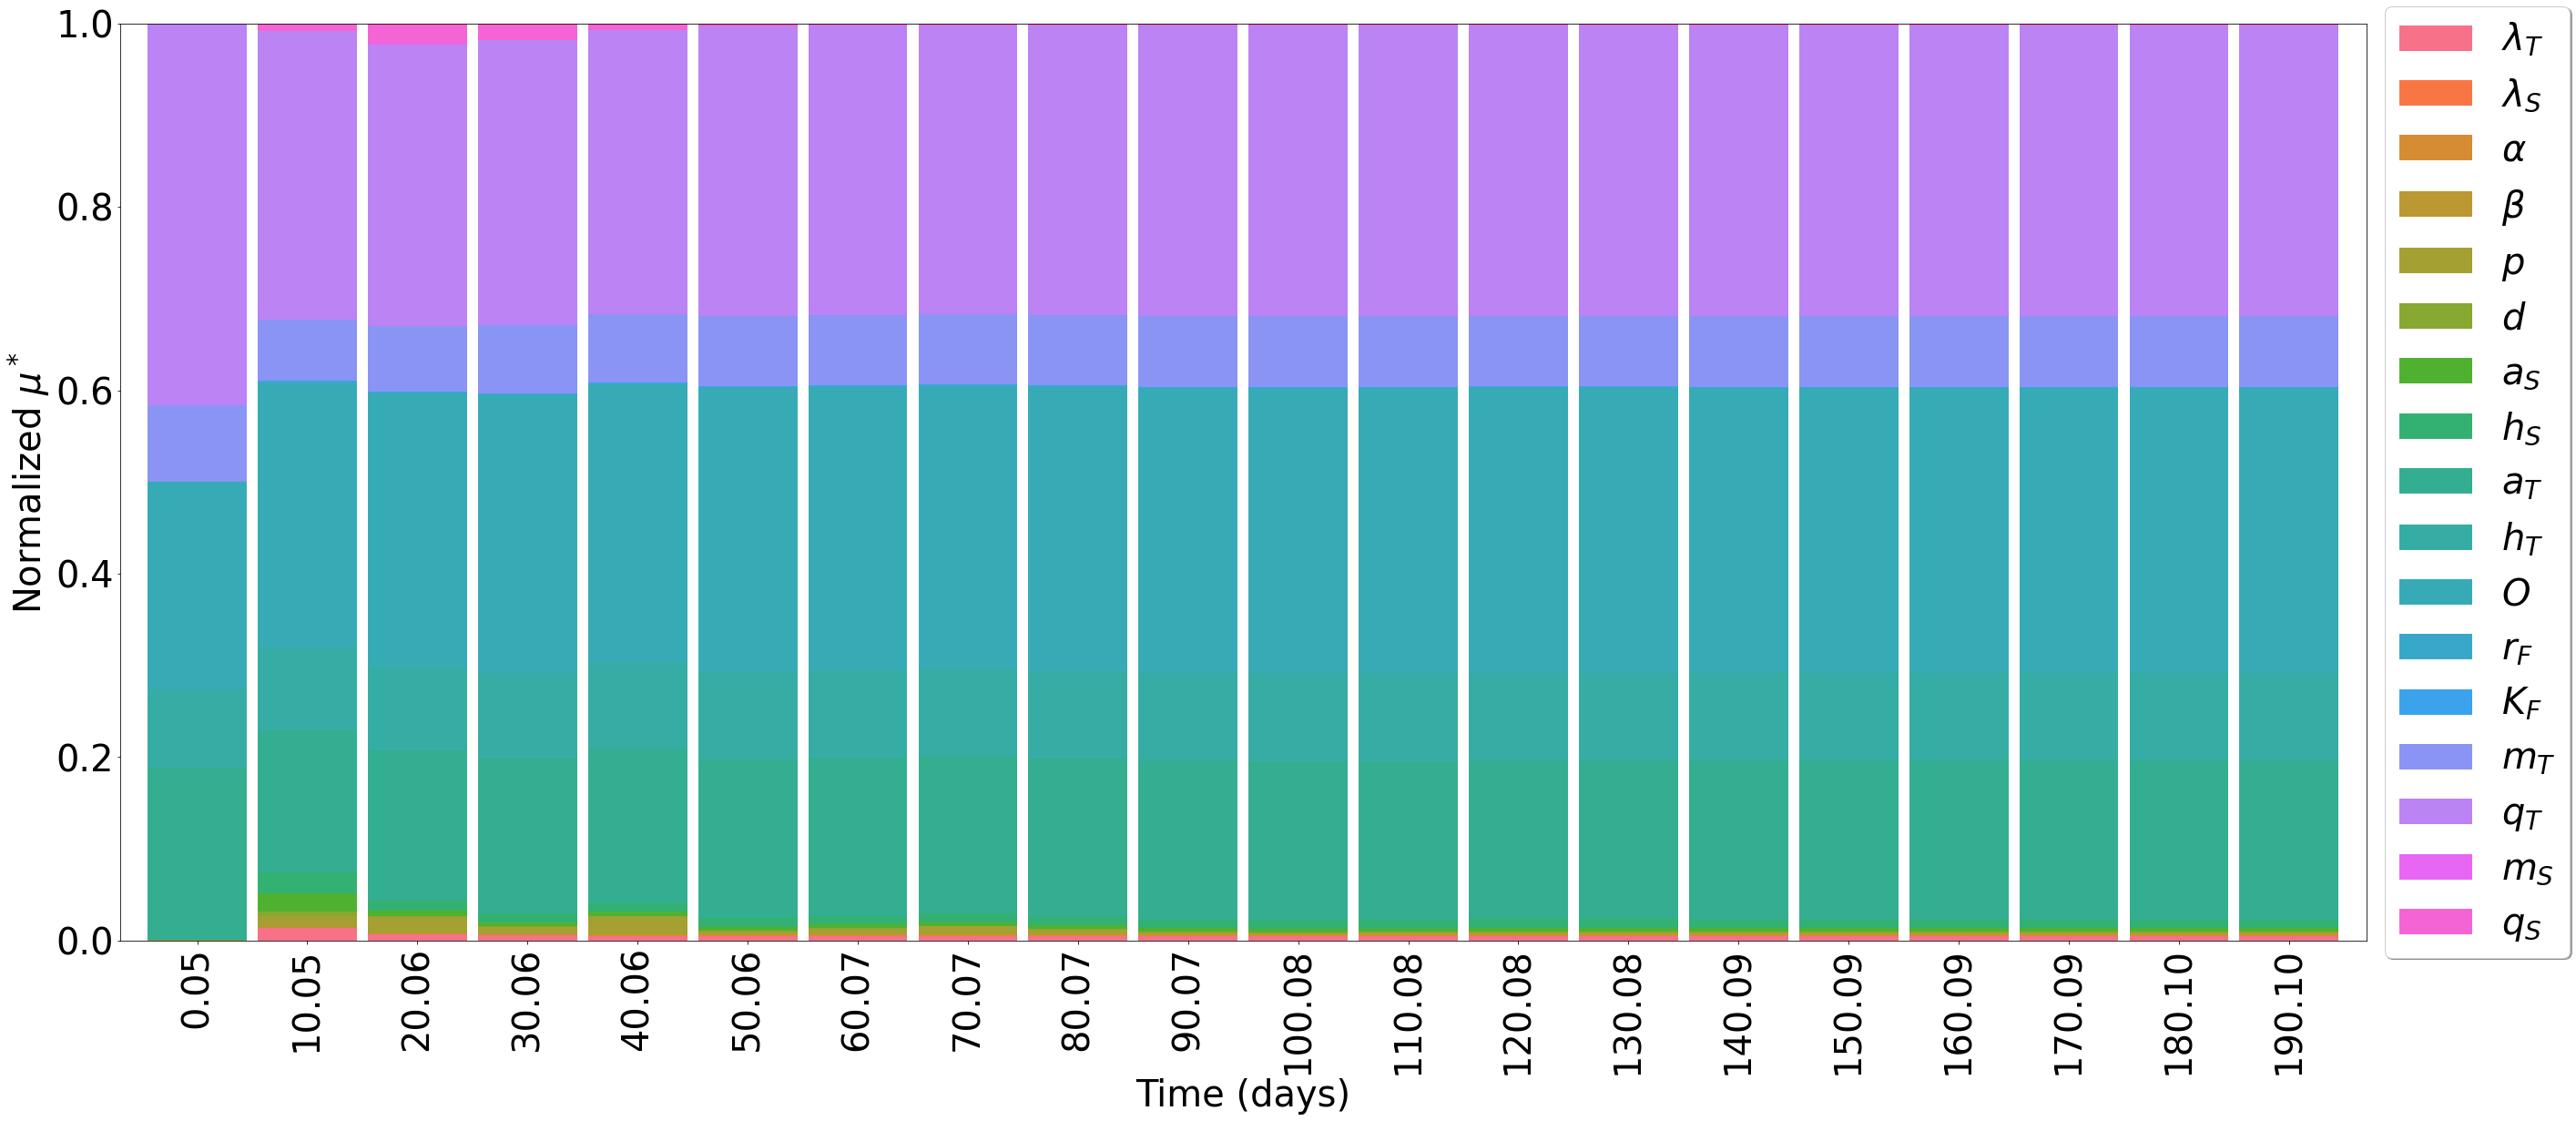

In [17]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Other_Theropods_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


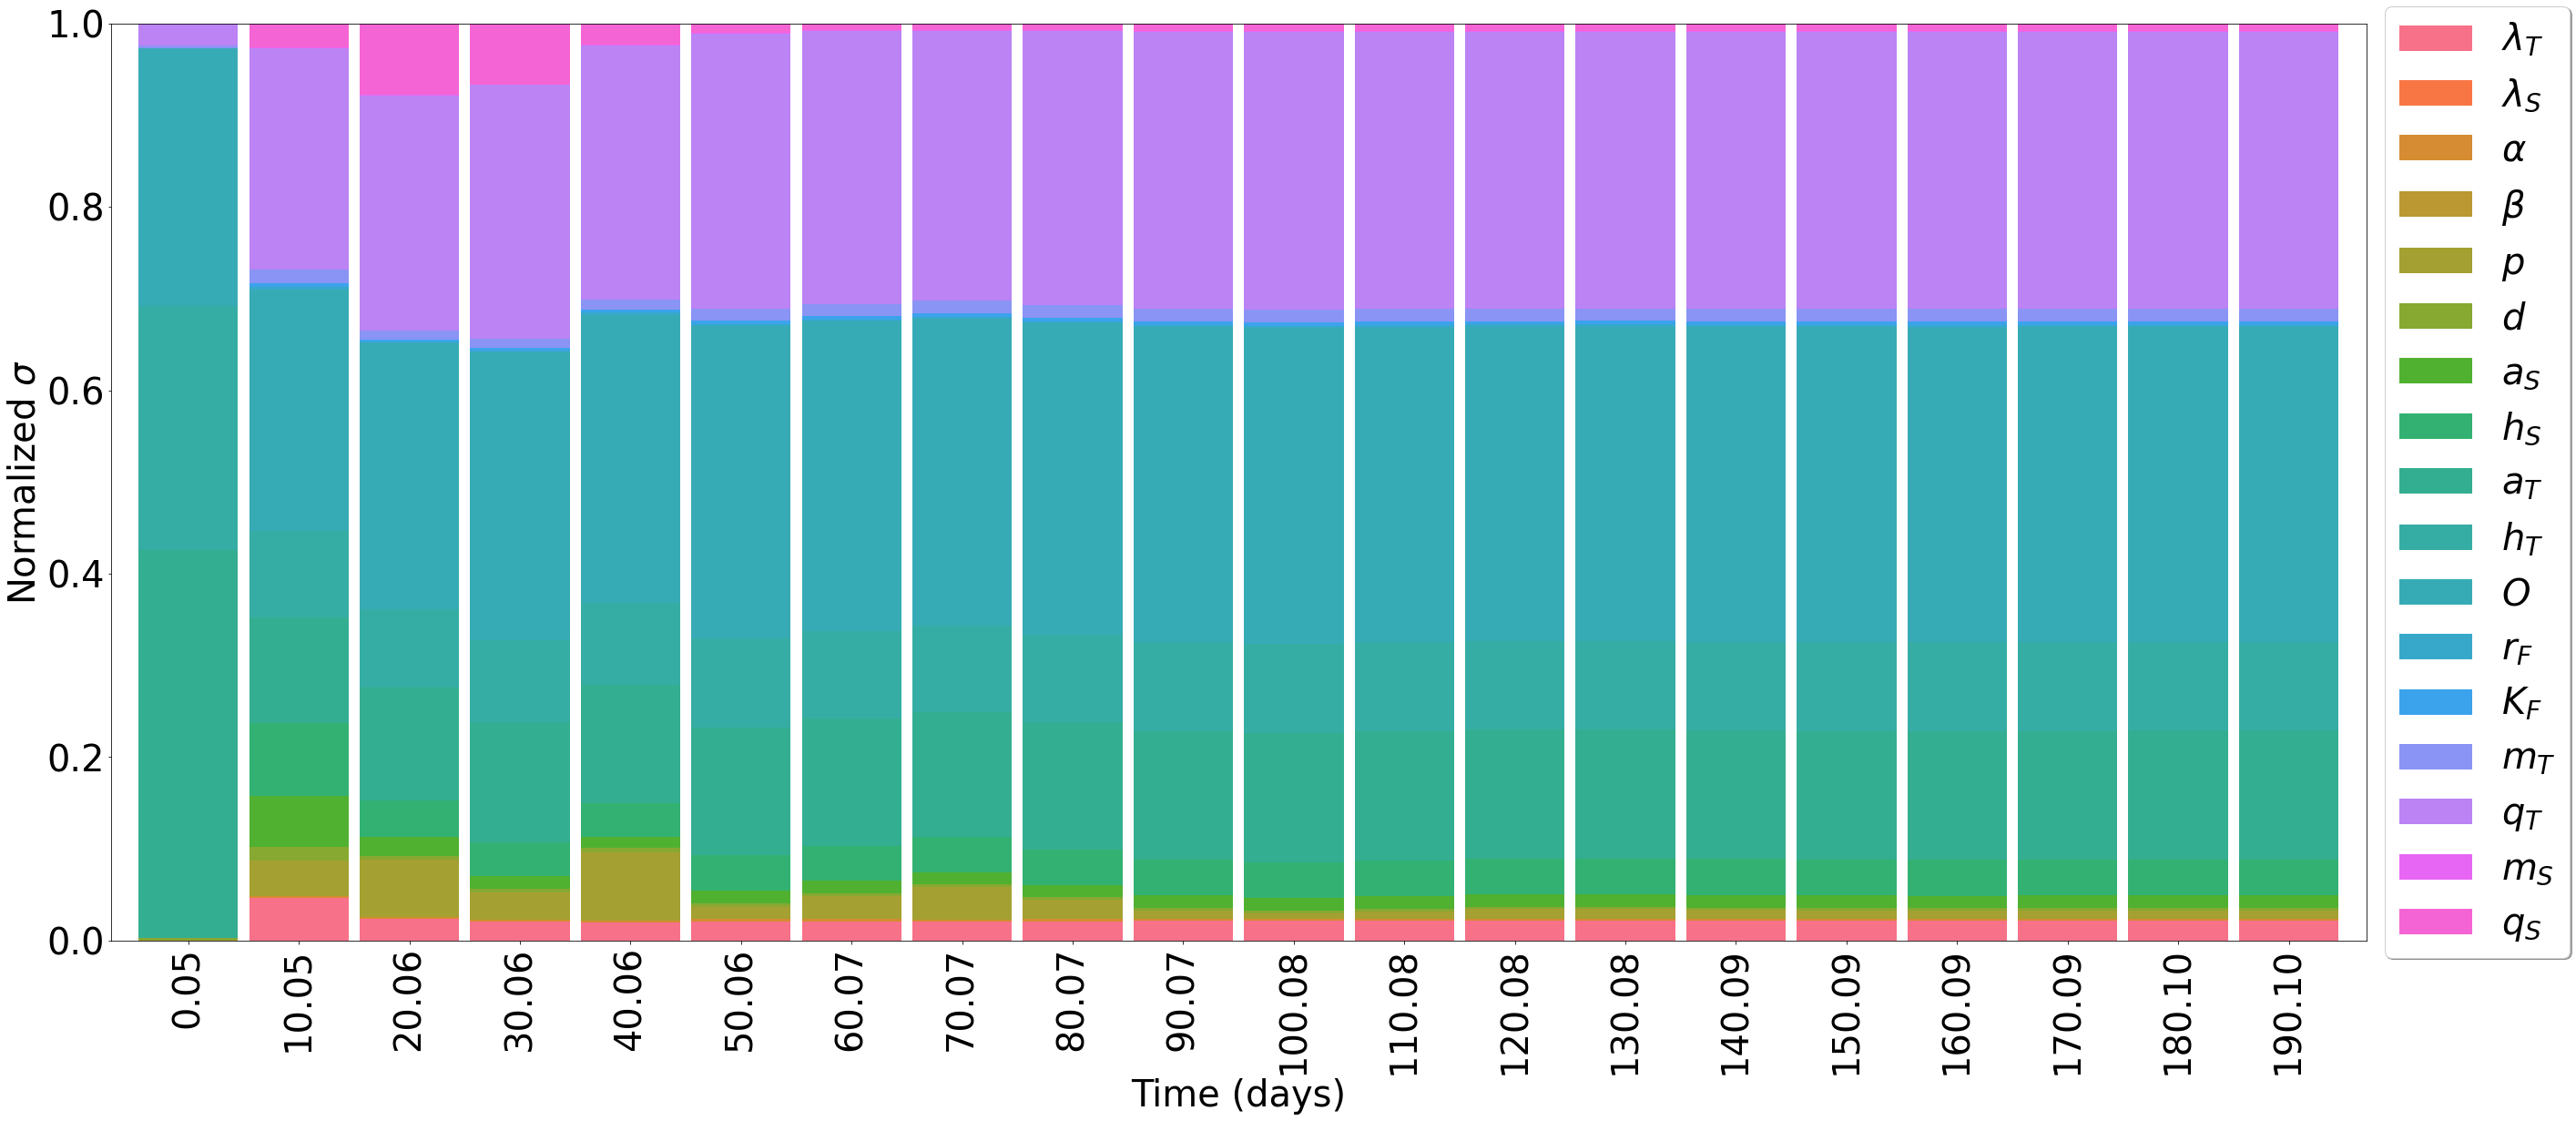

In [18]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_SA_Other_Theropods_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

## Continuation diagram

In [19]:
plt.rcParams.update({'font.size': 8})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['lines.linewidth'] = BIGGER_SIZE
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 49.76it/s]
<ipython-input-20-00fe48a1d0d3>:133: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


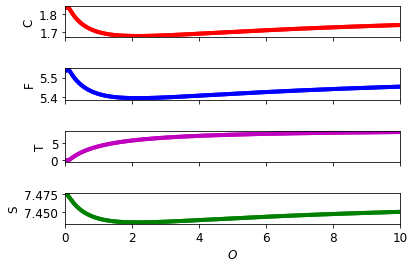

In [20]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions, (t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
#    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


O_min = 0
O_max = 10
O_points = np.linspace(O_min, O_max, num_of_points)
parameter_to_continuation = {"O": O_points}

O_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="O",
    parameter_span=(O_min, O_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        O_values["O"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        O_values["O"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$O$", ylabel=f"{variable_name}", xlim=(O_min, O_max))
    ax.plot(linewidth=15, markersize=20)
    ax.label_outer()

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['lines.linewidth'] = BIGGER_SIZE
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_continuation_O.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 117.75it/s]
<ipython-input-21-68e3cbb33bda>:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


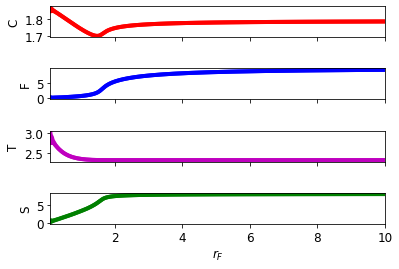

In [21]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
#    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


r_F_min = 0.1
r_F_max = 10
r_F_points = np.linspace(r_F_min, r_F_max, num_of_points)
parameter_to_continuation = {"r_F": r_F_points}

r_F_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="r_F",
    parameter_span=(r_F_min, r_F_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        r_F_values["r_F"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4]
    axs[index].plot(
        r_F_values["r_F"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$r_F$", ylabel=f"{variable_name}", xlim=(r_F_min, r_F_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_continuation_r_F.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 121.75it/s]
<ipython-input-22-e5dcf2189824>:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


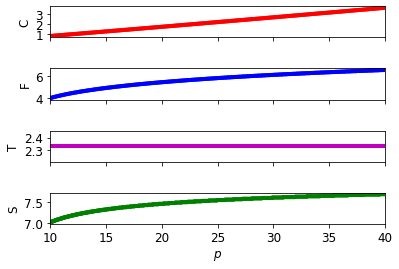

In [22]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
#    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


p_min = 10
p_max = 40
p_points = np.linspace(p_min, p_max, num_of_points)
parameter_to_continuation = {"p": p_points}

p_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="p",
    parameter_span=(p_min, p_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        p_values["p"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        p_values["p"], np.round(variable_result,2), color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$p$", ylabel=f"{variable_name}", xlim=(p_min, p_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/exponential_density_mediated_continuation_p.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 116.83it/s]
<ipython-input-23-231cfcb9ff6c>:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


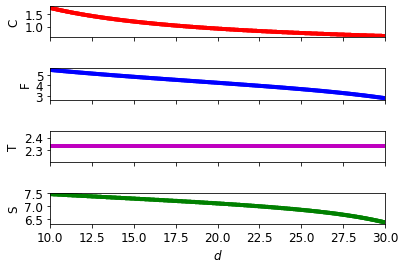

In [23]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "lambda_T": lambda_T,
    "lambda_S": lambda_S,
    "alpha": alpha,
    "beta": beta,
    "p": p,
#    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


d_min = 10
d_max = 30
d_points = np.linspace(d_min, d_max, num_of_points)
parameter_to_continuation = {"d": d_points}

d_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_exponential_density_mediated,
    continuation_variable_name="d",
    parameter_span=(d_min, d_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        d_values["d"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        d_values["d"], np.round(variable_result,2), color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$d$", ylabel=f"{variable_name}", xlim=(d_min, d_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
#plt.savefig("img/exponential_density_mediated_continuation_d.eps", format='eps', bbox_inches = "tight", dpi=300)

# No density-mediated interaction

## Parameter values

In [24]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [25]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [26]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


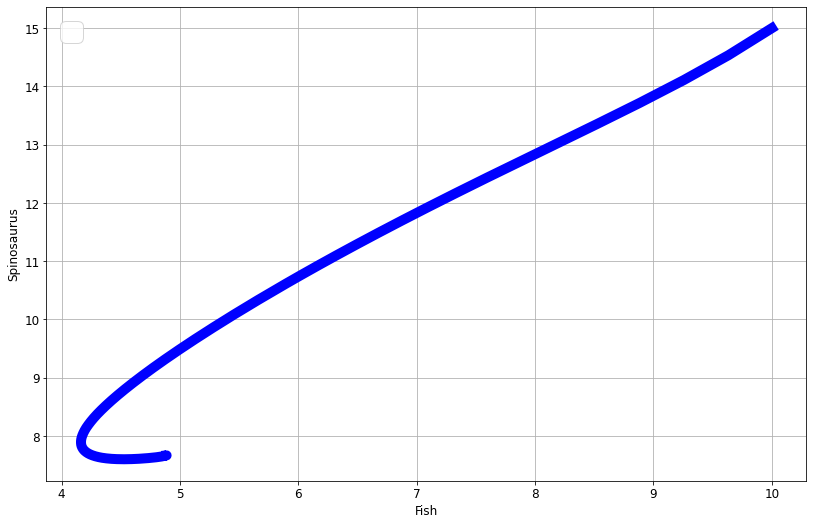

In [27]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


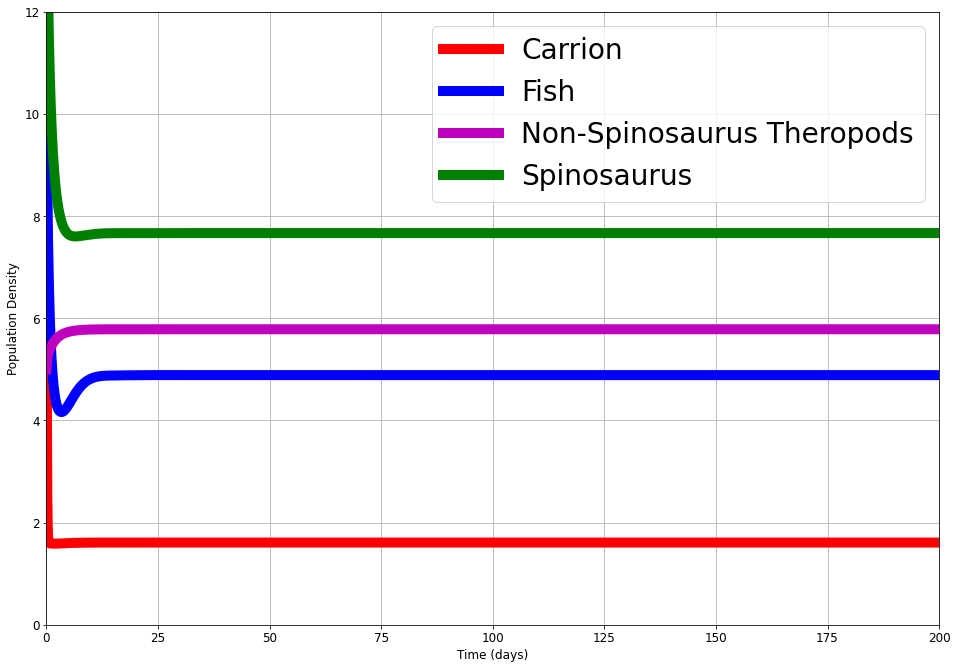

In [28]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

## Sensitivity analysis

### Least-Squares objective function

In [29]:
from SALib.sample.morris import sample as ee_sample

mean_values_params = [
    p,
    d,
    a_S,
    h_S,
    a_T,
    h_T,
    O,
    r_F,
    K_F,
    m_T,
    q_T,
    m_S,
    q_S,
]
factors_names = [
    r"$p$",
    r"$d$",
    r"$a_S$",
    r"$h_S$",
    r"$a_T$",
    r"$h_T$",
    r"$O$",
    r"$r_F$",
    r"$K_F$",
    r"$m_T$",
    r"$q_T$",
    r"$m_S$",
    r"$q_S$",
]
params_perturbations = 0.5
problem_info = {
    'num_vars': len(mean_values_params),
    'names': factors_names,
    'bounds': [[param - params_perturbations * param, param + params_perturbations * param] for param in mean_values_params]
}

grid_level = 4
num_of_trajectories = 20
parameter_values = ee_sample(problem_info, grid_level, num_of_trajectories, local_optimization=False, seed=seed)

### Spinosaurus

In [30]:
from tqdm import tqdm

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0
time_list_range = np.linspace(t0, tf + days_to_forecast, step)

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_No_density_mediated = ode_solver_No_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_No_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Spinosaurus_realization

100%|██████████| 56/56 [00:00<00:00, 259.97it/s]


In [31]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

100%|██████████| 4000/4000 [00:15<00:00, 252.26it/s]


,time_list,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.000779,0.004199,0.026484,0.375496,0.000022,0.000158,0.000003,0.000181,0.001374,0.0,0.000001,0.037028,0.554275
1,0.100025,0.001531,0.006895,0.029065,0.375733,0.000036,0.000303,0.000005,0.000373,0.003106,0.000001,0.000004,0.036648,0.546301
2,0.150038,0.002498,0.009402,0.031626,0.375492,0.000053,0.000476,0.000008,0.000574,0.005182,0.000002,0.000009,0.036331,0.538345
3,0.200050,0.003602,0.011461,0.034129,0.374943,0.000075,0.000657,0.00001,0.000768,0.007541,0.000004,0.000017,0.036086,0.530707
4,0.250063,0.00484,0.013116,0.036545,0.374017,0.000101,0.000847,0.000012,0.000948,0.010129,0.000006,0.000028,0.035902,0.523507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.146819,0.095973,0.087592,0.212262,0.002738,0.011003,0.000091,0.057943,0.047821,0.000822,0.006725,0.043787,0.286424
3995,199.849962,0.146819,0.095973,0.087592,0.212262,0.002738,0.011003,0.000091,0.057943,0.047821,0.000822,0.006725,0.043787,0.286424
3996,199.899975,0.146819,0.095973,0.087592,0.212262,0.002738,0.011003,0.000091,0.057943,0.047821,0.000822,0.006725,0.043787,0.286424
3997,199.949987,0.146819,0.095973,0.087592,0.212262,0.002738,0.011003,0.000091,0.057943,0.047821,0.000822,0.006725,0.043787,0.286424


In [32]:
df_sigmai

,time_list,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.001947,0.009424,0.073326,0.807295,0.000029,0.0002,0.000009,0.000723,0.006885,0.000001,0.000003,0.007239,0.092917
1,0.100025,0.00268,0.018884,0.070321,0.7348,0.000047,0.000648,0.000014,0.001272,0.013117,0.000003,0.000012,0.011406,0.146795
2,0.150038,0.003963,0.025535,0.069368,0.683089,0.0001,0.00102,0.000015,0.001783,0.019371,0.000007,0.000027,0.014044,0.181679
3,0.200050,0.005503,0.030385,0.069547,0.643496,0.000158,0.001427,0.000013,0.002237,0.025841,0.000011,0.00005,0.015828,0.205504
4,0.250063,0.007368,0.034329,0.070342,0.611339,0.000237,0.001865,0.00001,0.002662,0.032567,0.000015,0.00008,0.017109,0.222078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.120208,0.082113,0.113254,0.208805,0.005255,0.010009,0.00013,0.111015,0.077606,0.000839,0.009689,0.018407,0.24267
3995,199.849962,0.120208,0.082113,0.113254,0.208805,0.005255,0.010009,0.00013,0.111015,0.077606,0.000839,0.009689,0.018407,0.24267
3996,199.899975,0.120208,0.082113,0.113254,0.208805,0.005255,0.010009,0.00013,0.111015,0.077606,0.000839,0.009689,0.018407,0.24267
3997,199.949987,0.120208,0.082113,0.113254,0.208805,0.005255,0.010009,0.00013,0.111015,0.077606,0.000839,0.009689,0.018407,0.24267


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


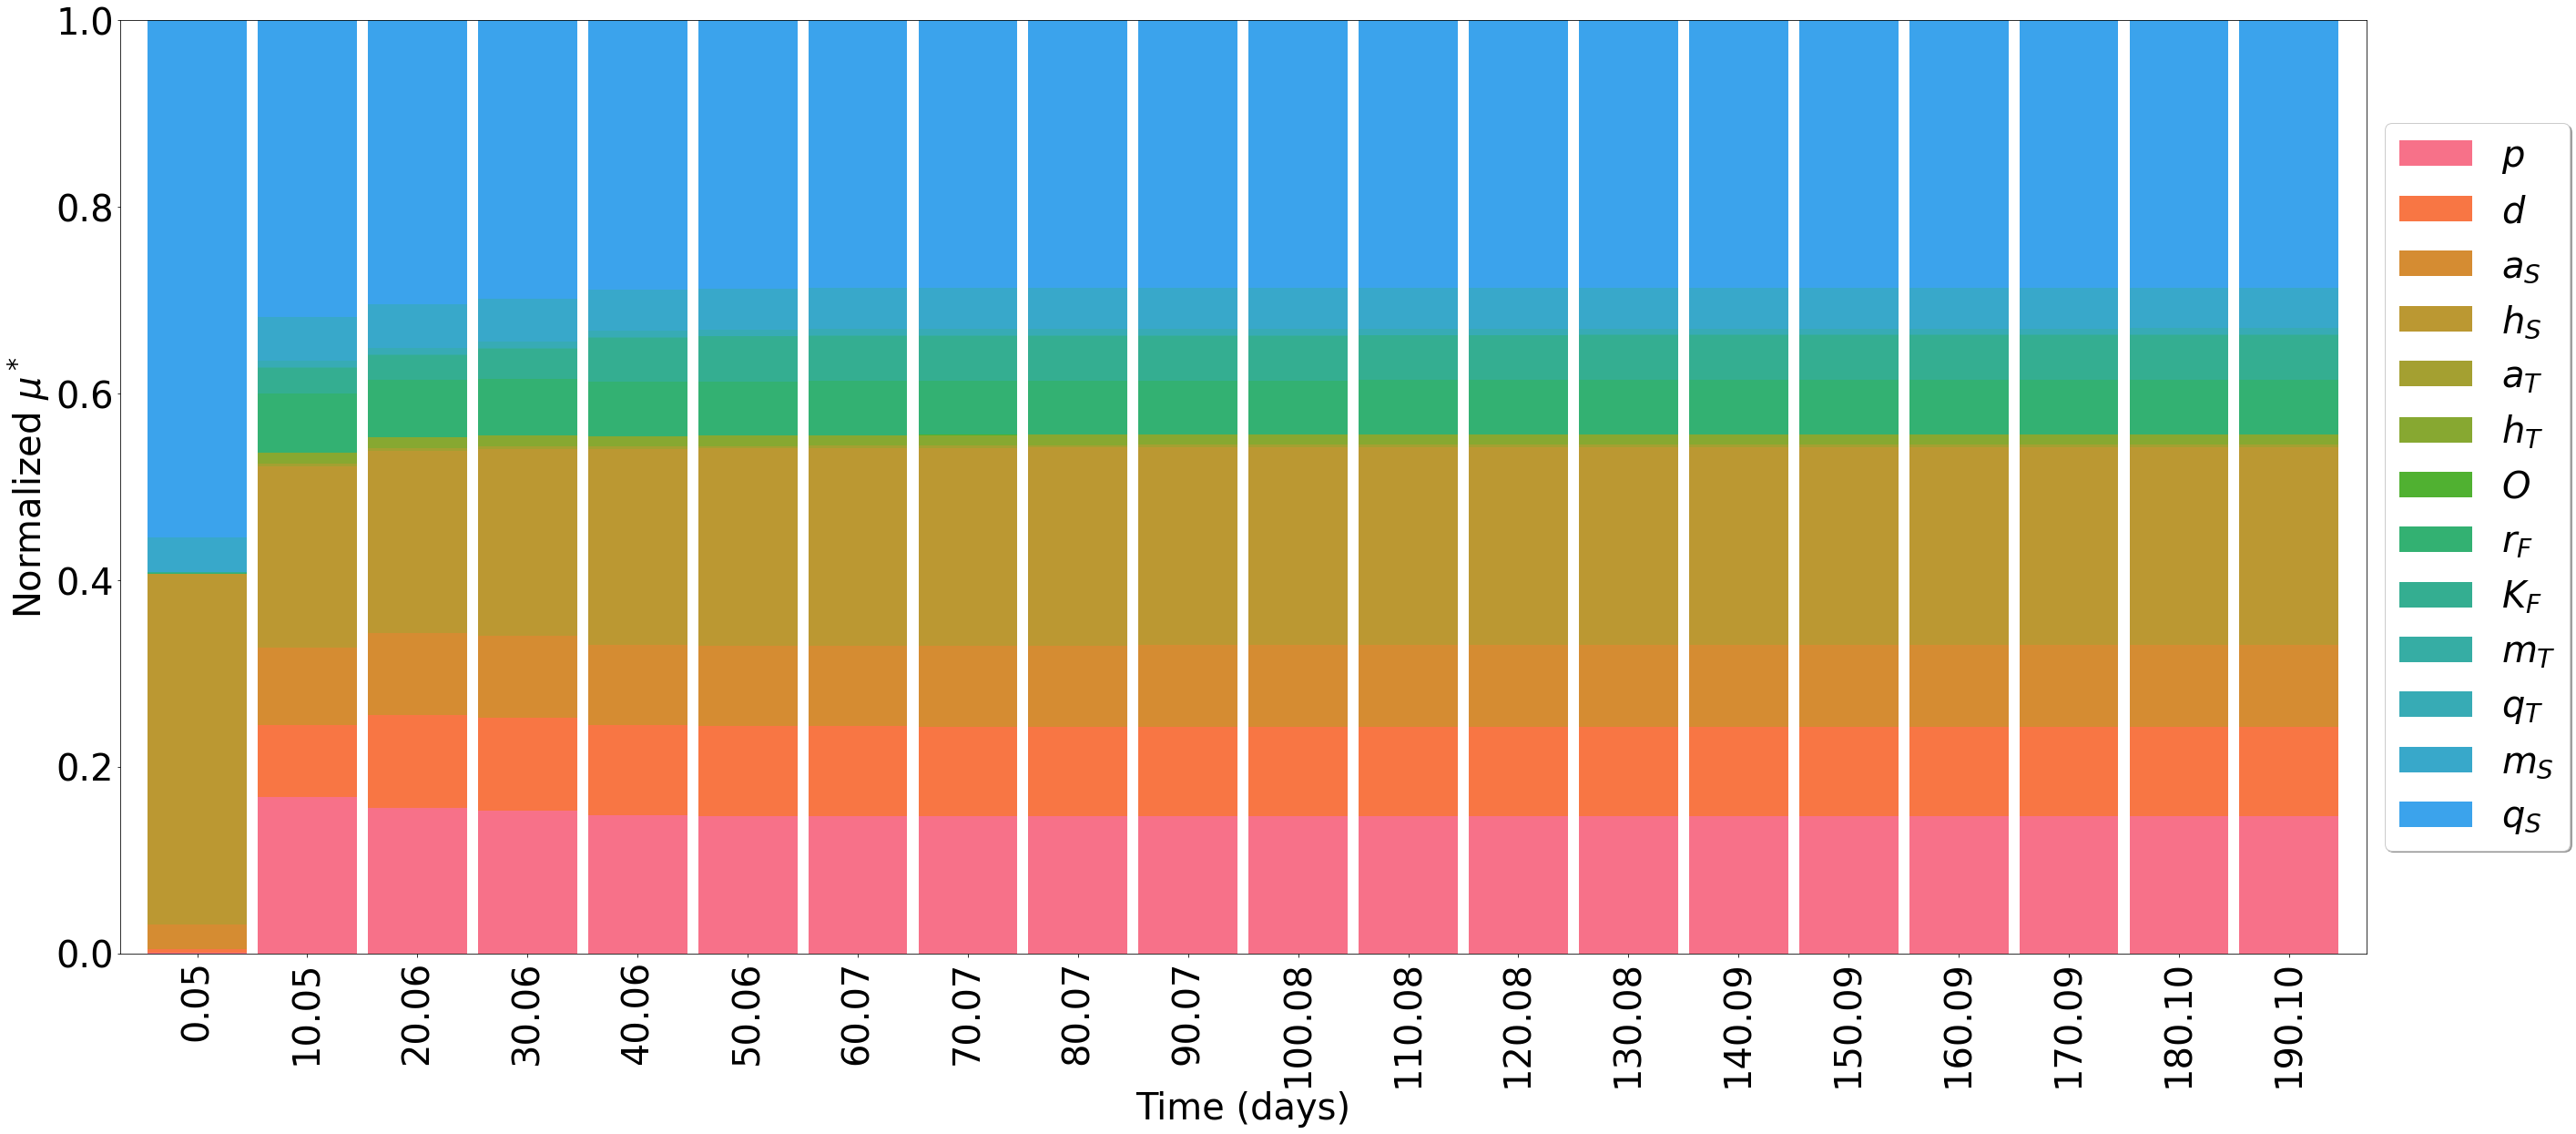

In [33]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Spinosaurus_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


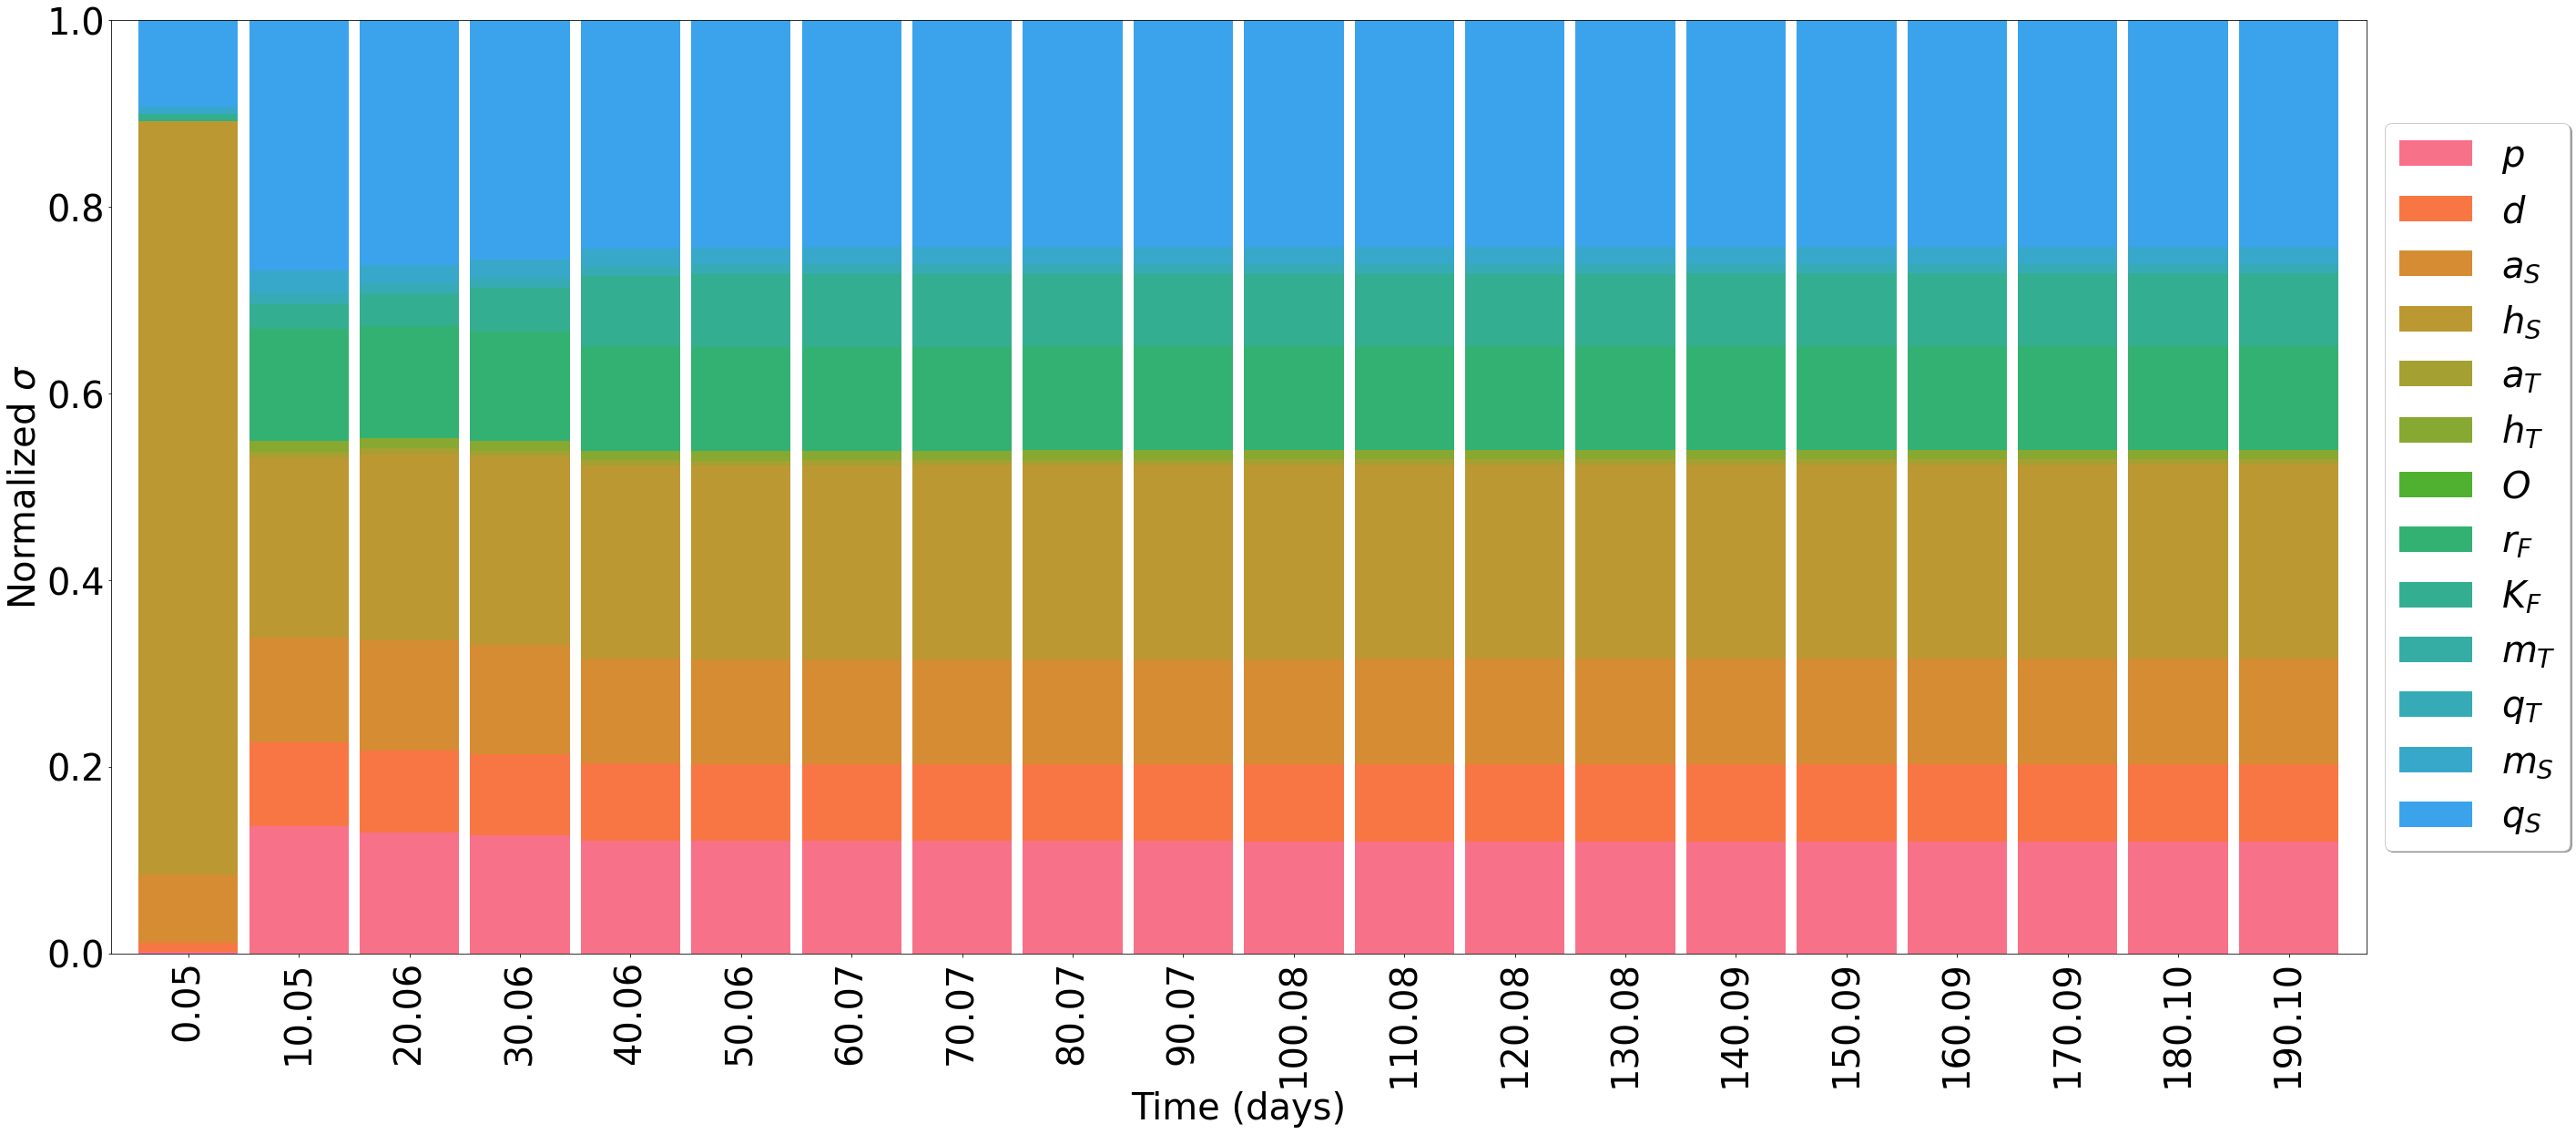

In [34]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Spinosaurus_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

### Non-Spinosaurus Theropods

In [35]:
from tqdm import tqdm

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0
time_list_range = np.linspace(t0, tf + days_to_forecast, step)

#time_list_range = time_list

num_of_realizations = parameter_values.shape[0]
num_of_time_list_points = time_list_range.shape[0]
qoi_sensitivity_outputs = np.zeros([num_of_realizations, num_of_time_list_points])

for realization_index, parameters_realization in tqdm(enumerate(parameter_values), total=len(parameter_values)):
    
    realization_ODE_No_density_mediated = ode_solver_No_density_mediated(
        y0,
        (t0, tf + days_to_forecast),
        time_list_range,
        *parameters_realization
    )
    
    Carrion_realization, Fish_realization, Other_Theropods_realization, Spinosaurus_realization = realization_ODE_No_density_mediated.y
    
    qoi_sensitivity_outputs[realization_index, :] = Other_Theropods_realization

100%|██████████| 56/56 [00:00<00:00, 285.92it/s]


In [36]:
from SALib.analyze.morris import analyze as ee_analyze
import pandas as pd

df_Si = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_sigmai = pd.DataFrame(columns=['time_list', *problem_info['names']])
df_Si['time_list'] = time_list
df_sigmai['time_list'] = time_list
for time_list_point in tqdm(range(num_of_time_list_points)):
    try:
        Si = ee_analyze(
            problem_info, 
            parameter_values, 
            qoi_sensitivity_outputs[:, time_list_point], 
            num_levels=grid_level, 
            seed=seed
        )
        Si['mu_star_normalized'] = Si['mu_star'] / Si['mu_star'].sum()
        sigmai_normalized = Si['sigma'] / Si['sigma'].sum()
        for idx, param_name in enumerate(problem_info['names']):
            df_Si.loc[time_list_point, param_name] = Si['mu_star_normalized'][idx]
            df_sigmai.loc[time_list_point, param_name] = sigmai_normalized[idx]
    except:
        continue

df_Si.sort_values(by='time_list', inplace=True)
df_Si.drop(index=0, inplace=True)
df_Si.dropna(inplace=True)
df_Si.reset_index(drop=True, inplace=True)

df_sigmai.sort_values(by='time_list', inplace=True)
df_sigmai.drop(index=0, inplace=True)
df_sigmai.dropna(inplace=True)
df_sigmai.reset_index(drop=True, inplace=True)

valid_time_lists = df_Si.time_list.values
df_Si

100%|██████████| 4000/4000 [00:15<00:00, 265.02it/s]


,time_list,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.002269,0.018472,0.000133,0.001198,0.078985,0.501781,0.00509,0.000005,0.00002,0.065088,0.326921,0.000002,0.000037
1,0.100025,0.00562,0.038676,0.000334,0.002685,0.088588,0.468796,0.007737,0.000021,0.000084,0.064041,0.323252,0.000007,0.00016
2,0.150038,0.01005,0.055457,0.000612,0.004059,0.094628,0.438889,0.010679,0.000051,0.000208,0.063386,0.321576,0.000016,0.000389
3,0.200050,0.015385,0.066506,0.000975,0.005191,0.098256,0.413747,0.01339,0.000092,0.00039,0.063185,0.322151,0.00003,0.000702
4,0.250063,0.021228,0.072575,0.001415,0.006164,0.10078,0.392929,0.015651,0.000141,0.000615,0.063275,0.324117,0.000047,0.001064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.085634,0.059261,0.025767,0.028091,0.106883,0.215833,0.026625,0.003584,0.007869,0.059662,0.362532,0.002618,0.01564
3995,199.849962,0.085634,0.059261,0.025767,0.028091,0.106883,0.215833,0.026625,0.003584,0.007869,0.059662,0.362532,0.002618,0.01564
3996,199.899975,0.085634,0.059261,0.025767,0.028091,0.106883,0.215833,0.026625,0.003584,0.007869,0.059662,0.362532,0.002618,0.01564
3997,199.949987,0.085634,0.059261,0.025767,0.028091,0.106883,0.215833,0.026625,0.003584,0.007869,0.059662,0.362532,0.002618,0.01564


In [37]:
df_sigmai

,time_list,$p$,$d$,$a_S$,$h_S$,$a_T$,$h_T$,$O$,$r_F$,$K_F$,$m_T$,$q_T$,$m_S$,$q_S$
0,0.050013,0.006184,0.084659,0.000605,0.004414,0.397629,0.471066,0.026565,0.000021,0.000041,0.002874,0.00586,0.000003,0.000077
1,0.100025,0.014359,0.15305,0.001349,0.008483,0.398472,0.369538,0.038505,0.000077,0.000148,0.004958,0.010702,0.000014,0.000346
2,0.150038,0.024699,0.190649,0.002277,0.010579,0.385899,0.311608,0.050237,0.000172,0.000335,0.00683,0.01589,0.000031,0.000795
3,0.200050,0.036505,0.200618,0.003525,0.010974,0.371636,0.283594,0.060019,0.000296,0.000619,0.008758,0.02203,0.000052,0.001373
4,0.250063,0.04858,0.193534,0.005105,0.010878,0.359579,0.271595,0.067306,0.000437,0.000992,0.010783,0.02913,0.000071,0.002012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,199.799950,0.097573,0.057687,0.046896,0.043666,0.133262,0.262551,0.043908,0.009045,0.024636,0.029305,0.231131,0.002678,0.017662
3995,199.849962,0.097573,0.057687,0.046896,0.043666,0.133262,0.262551,0.043908,0.009045,0.024636,0.029305,0.231131,0.002678,0.017662
3996,199.899975,0.097573,0.057687,0.046896,0.043666,0.133262,0.262551,0.043908,0.009045,0.024636,0.029305,0.231131,0.002678,0.017662
3997,199.949987,0.097572,0.057687,0.046896,0.043666,0.133262,0.262551,0.043908,0.009045,0.024636,0.029305,0.231131,0.002678,0.017662


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


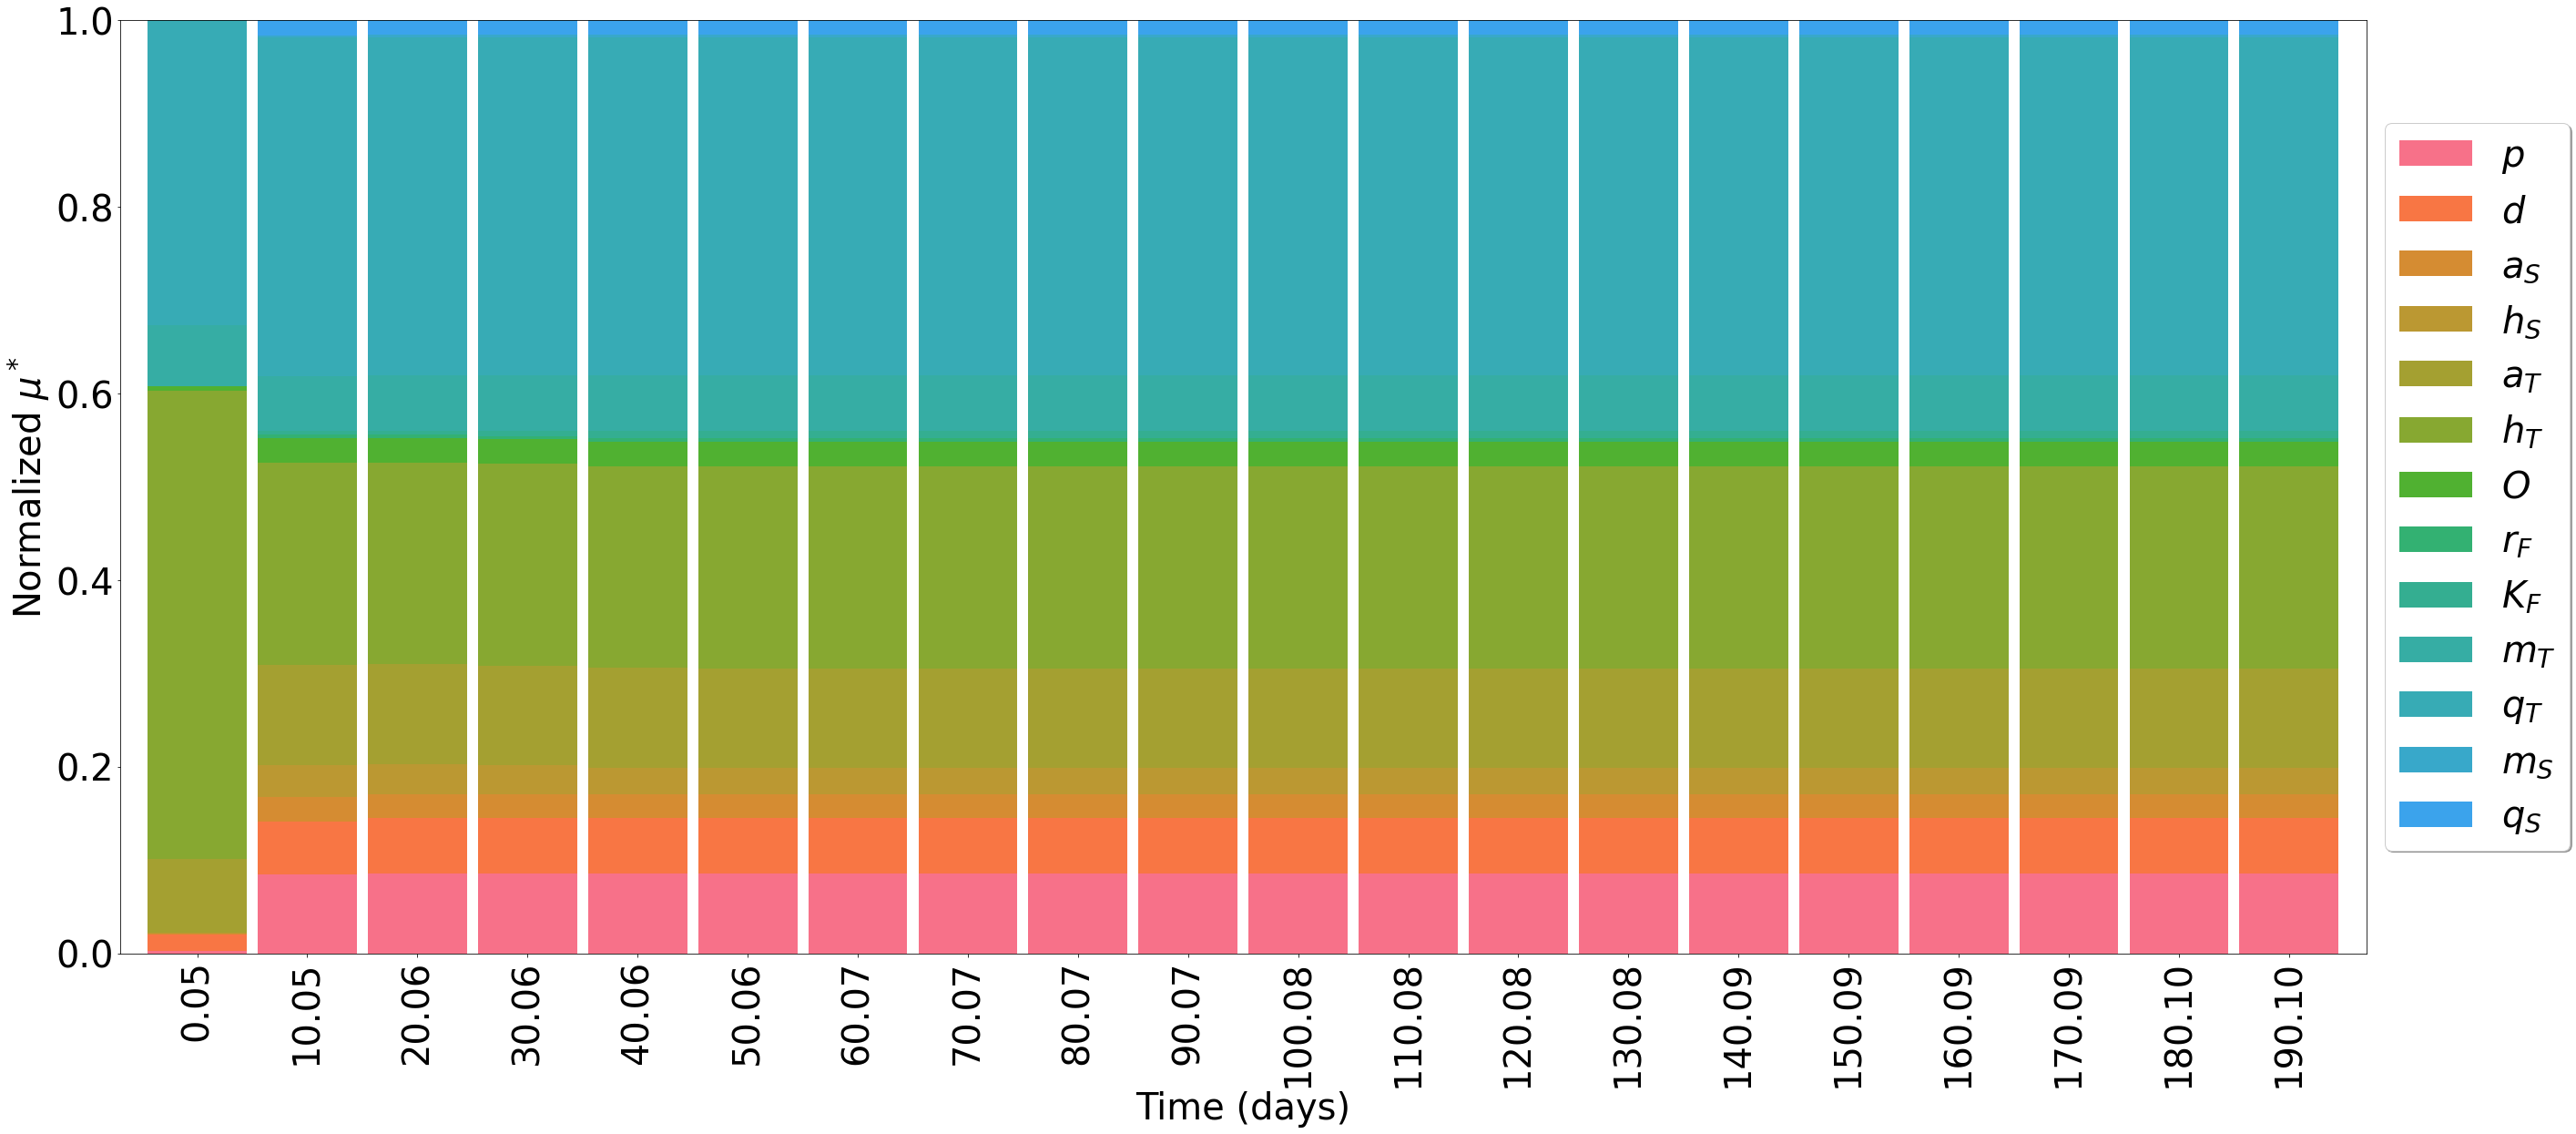

In [38]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_mu = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_Si[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_mu[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\mu^*$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Other_Theropods_mu_star.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


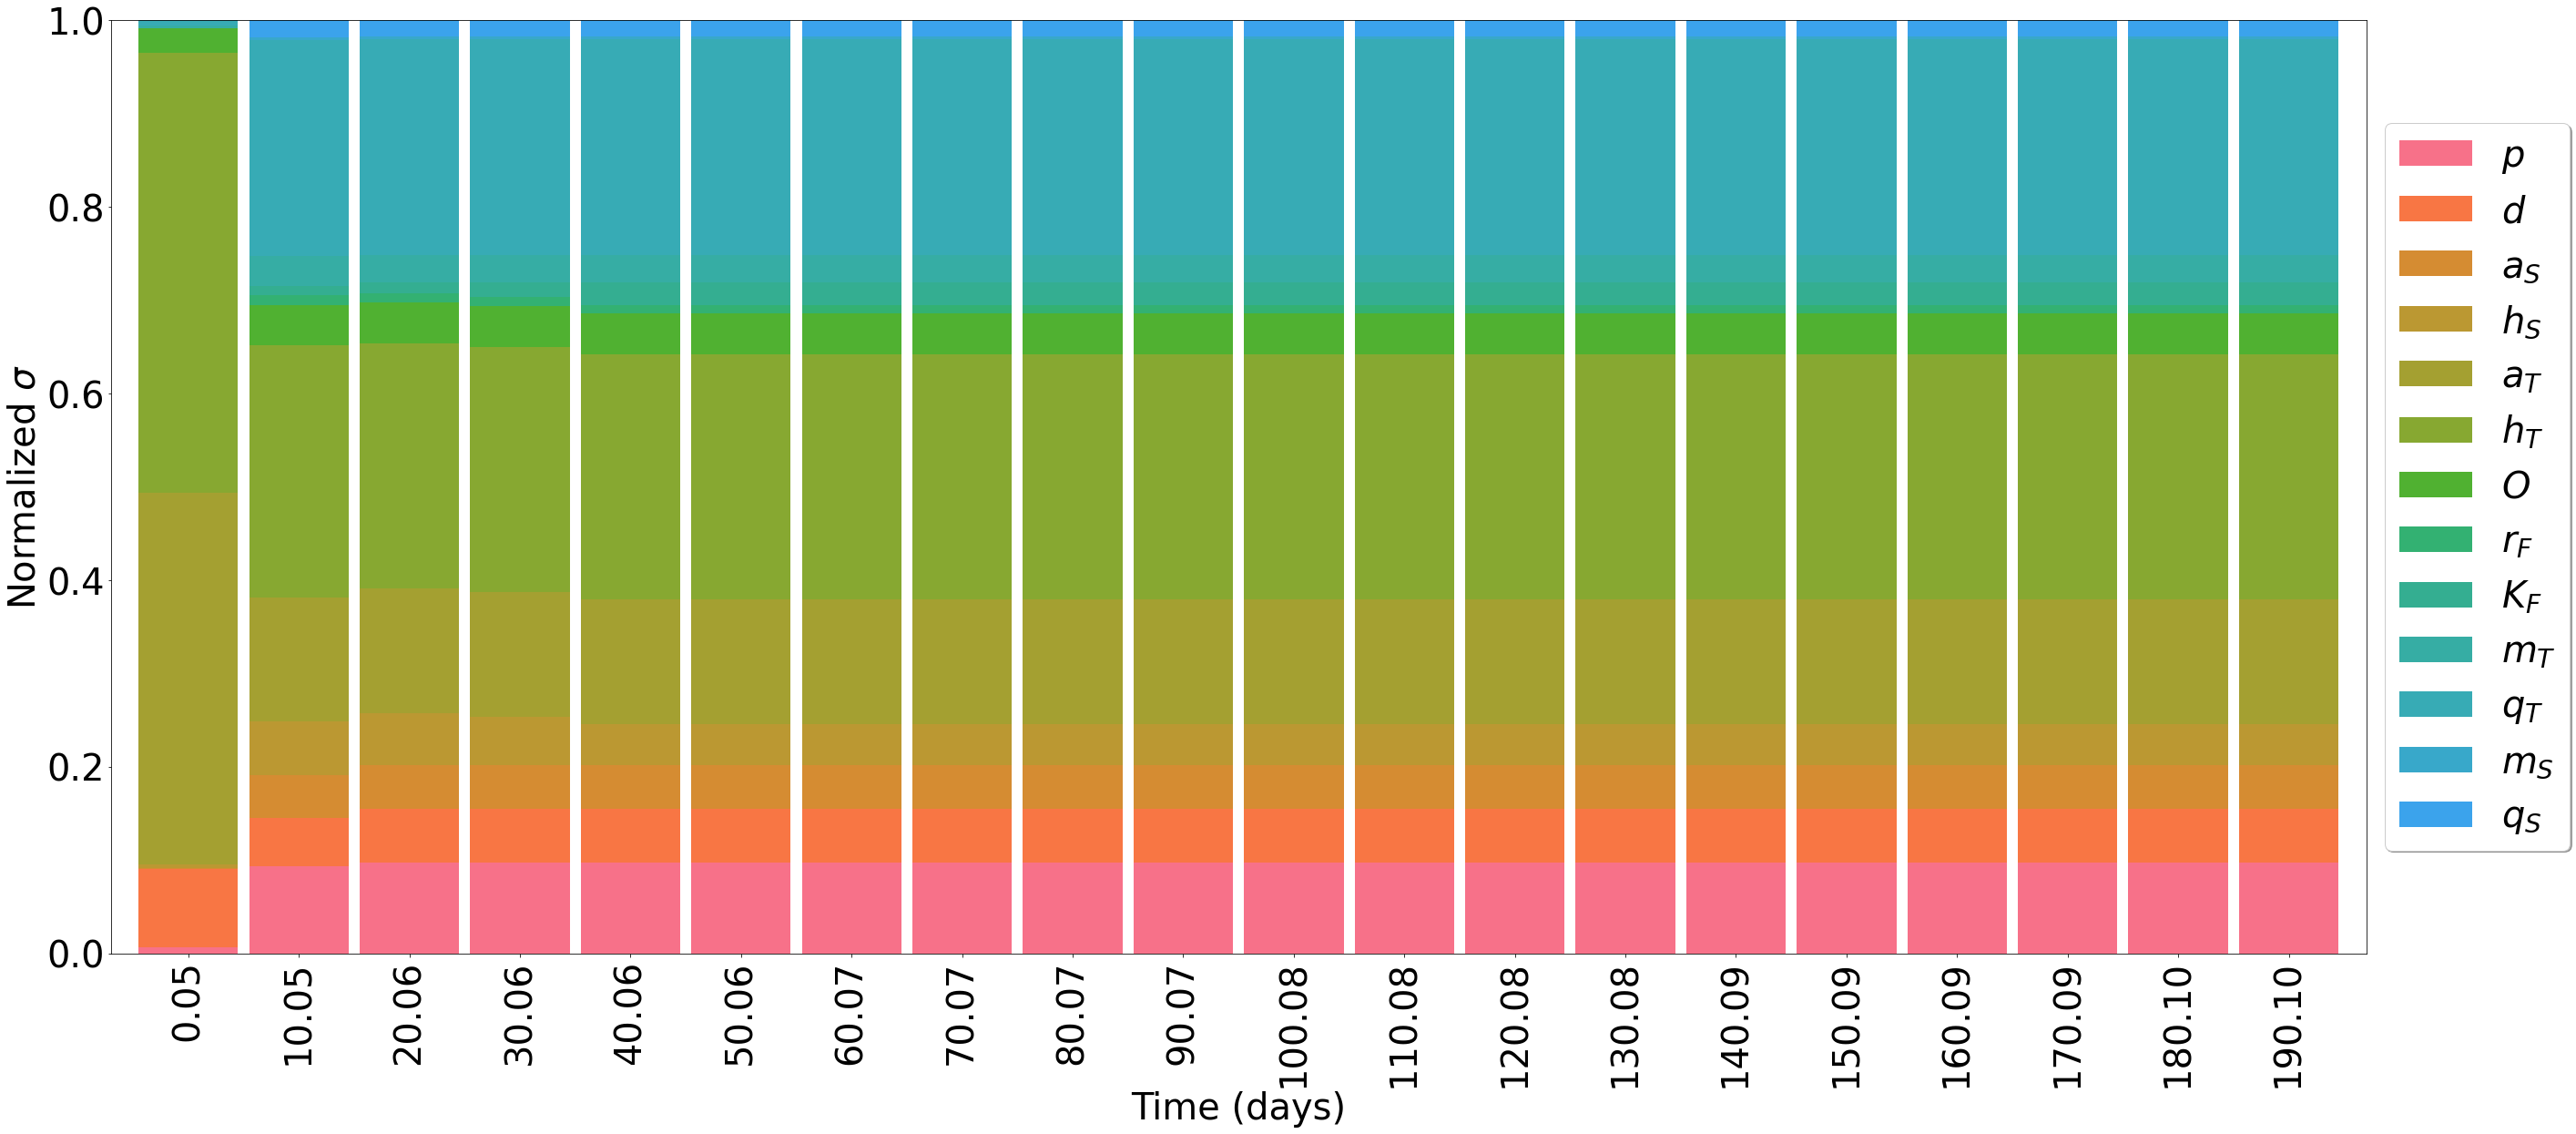

In [39]:
import seaborn as sns

fig = plt.figure()
ax = plt.subplot(111)
step_to_plot = 200
valid_time_lists_to_plot_sigma = valid_time_lists[::step_to_plot]

colors = sns.color_palette("husl",18)
ax.set_prop_cycle('color', colors)

df_sigmai[::step_to_plot].plot.bar(x='time_list', rot=90, width=0.9, figsize=(40, 18), stacked=True, ax=ax, color=colors)
ax.xaxis.set_major_formatter(lambda x, pos: f"{valid_time_lists_to_plot_sigma[x]:.2f}")
plt.xlabel("Time (days)", fontsize = 40)
plt.ylabel(r"Normalized $\sigma$", fontsize = 40)

plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.ylim([0, 1])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fancybox=True, shadow=True, fontsize=40)

plt.tight_layout()
plt.savefig("img/No_density_mediated_SA_Other_Theropods_sigma.eps", format='eps', bbox_inches = "tight", dpi=300)
plt.show()

## Continuation diagram

In [40]:
plt.rcParams.update({'font.size': 8})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['lines.linewidth'] = BIGGER_SIZE
plt.rcParams.update({'font.size': BIGGER_SIZE})

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 109.22it/s]
<ipython-input-41-7bfd80187b7a>:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


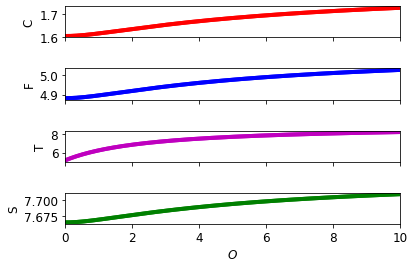

In [41]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions, (t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
#    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


O_min = 0
O_max = 10
O_points = np.linspace(O_min, O_max, num_of_points)
parameter_to_continuation = {"O": O_points}

O_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="O",
    parameter_span=(O_min, O_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        O_values["O"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        O_values["O"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$O$", ylabel=f"{variable_name}", xlim=(O_min, O_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/No_density_mediated_continuation_O.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 40.58it/s]
<ipython-input-42-1267640d83e4>:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


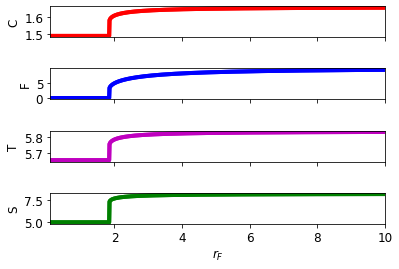

In [42]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
#    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


r_F_min = 0.1
r_F_max = 10
r_F_points = np.linspace(r_F_min, r_F_max, num_of_points)
parameter_to_continuation = {"r_F": r_F_points}

r_F_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="r_F",
    parameter_span=(r_F_min, r_F_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        r_F_values["r_F"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        r_F_values["r_F"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$r_F$", ylabel=f"{variable_name}", xlim=(r_F_min, r_F_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/No_density_mediated_continuation_r_F.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 121.13it/s]
<ipython-input-43-43de0f8486d8>:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


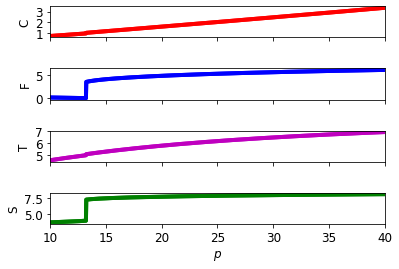

In [43]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
#    "p": p,
    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


p_min = 10
p_max = 40
p_points = np.linspace(p_min, p_max, num_of_points)
parameter_to_continuation = {"p": p_points}

p_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="p",
    parameter_span=(p_min, p_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        p_values["p"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        p_values["p"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$p$", ylabel=f"{variable_name}", xlim=(p_min, p_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
plt.savefig("img/No_density_mediated_continuation_p.eps", format='eps', bbox_inches = "tight", dpi=300)

Plotting results: 100%|██████████| 4/4 [00:00<00:00, 108.78it/s]
<ipython-input-44-4442b88d8f1a>:117: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


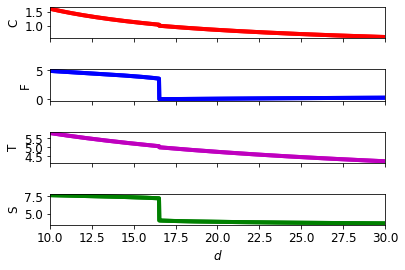

In [44]:
def run_continuation_analysis(
    ode_solver_wrapper,
    continuation_variable_name,
    parameter_span,
    parameter_num_of_points,
    fixed_parameters_dict,
    initial_conditions,
    output_variable_name_list,
    num_of_last_outcomes,
):
    if type(continuation_variable_name) != str:
        raise ValueError("Input continuation_variable_name must be of str type.")

    if type(parameter_num_of_points) != int:
        raise ValueError("Input parameter_num_of_points must be of integer type.")

    parameter_span_type = type(parameter_span)
    if parameter_span_type != tuple and parameter_span_type != list:
        raise ValueError("Input parameter_span must be a list or tuple of values.")
    else:
        if len(parameter_span) != 2:
            raise ValueError("Input parameter_span must be a list or tuple with two values.")

    if len(initial_conditions) != len(output_variable_name_list):
        raise ValueError(
            "The number of output variables from ODE model must be equal to number of initial conditions."
        )

    parameter_values = np.linspace(parameter_span[0], parameter_span[1], parameter_num_of_points)
    continuation_parameter_values_dict = {continuation_variable_name: parameter_values}
    time_values = time_list

    # Creating dictionary to record continuation realizations
    output_variables_dict = dict()
    for output_variable_name in output_variable_name_list:
        output_variables_dict[output_variable_name] = list()

    # Running continuation evaluations
    parameter_progress_bar = tqdm(parameter_values)
    for parameter_value in parameter_progress_bar:
        parameter_progress_bar.set_description("Running continuation")
        parameters = fixed_parameters
        parameters[continuation_variable_name] = parameter_value
        ode_solver_output = ode_solver_wrapper(initial_conditions,(t0, tf + days_to_forecast), time_values, **parameters)
        t_output, y_output = ode_solver_output.t, ode_solver_output.y
        y_last_outputs = y_output[:, -num_of_last_outcomes:]
        output_index = 0
        for output_variable_name in output_variable_name_list:
            output_variable_last_results = y_last_outputs[output_index]
            output_variables_dict[output_variable_name].append(
                [output_variable_last_results.min(), output_variable_last_results.max()]
            )
            output_index += 1

    return continuation_parameter_values_dict, output_variables_dict

fixed_parameters = {
    "p": p,
#    "d": d,
    "a_S": a_S,
    "h_S": h_S,
    "a_T": a_T,
    "h_T": h_T,
    "O": O,
    "r_F": r_F,
    "K_F": K_F,
    "m_T": m_T,
    "q_T": q_T,
    "m_S": m_S,
    "q_S": q_S
}


d_min = 10
d_max = 30
d_points = np.linspace(d_min, d_max, num_of_points)
parameter_to_continuation = {"d": d_points}

d_values, y_last_results = run_continuation_analysis(
    ode_solver_wrapper=ode_solver_No_density_mediated,
    continuation_variable_name="d",
    parameter_span=(d_min, d_max),
    parameter_num_of_points=num_of_points,
    fixed_parameters_dict=fixed_parameters,
    initial_conditions=y0,
    output_variable_name_list=["C", "F", "T", "S"],
    num_of_last_outcomes=1000,
)

colors_list = ["r", "b", "m", "g"]
results_progress_bar = tqdm(y_last_results)
num_of_state_variables = len(y_last_results)
fig, axs = plt.subplots(num_of_state_variables, sharex=True, gridspec_kw={"hspace": 1})
index = 0
for variable_name in results_progress_bar:
    results_progress_bar.set_description("Plotting results")
    variable_result = np.array(y_last_results[variable_name])
    variable_min_values = variable_result[:, 0].astype(np.int_)
    variable_max_values = variable_result[:, 1].astype(np.int_)

    color = colors_list[index]
#    axs[index].fill_between(
#        d_values["d"], variable_min_values, variable_max_values, color=color, alpha=1, linewidth=4
    axs[index].plot(
        d_values["d"], variable_result, color=color, alpha=1, linewidth=4
    )

    index += 1

for ax, variable_name in zip(axs.flat, y_last_results):
    ax.set(xlabel=r"$d$", ylabel=f"{variable_name}", xlim=(d_min, d_max))
    ax.plot(linewidth=10, markersize=12)
    ax.label_outer()

plt.rcParams.update({'font.size': 8})

plt.tight_layout()
#plt.savefig("img/No_density_mediated_continuation_d.eps", format='eps', bbox_inches = "tight", dpi=300)

# Complementary analyses

# No density-mediated interaction

## Parameter values

In [45]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [46]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [47]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


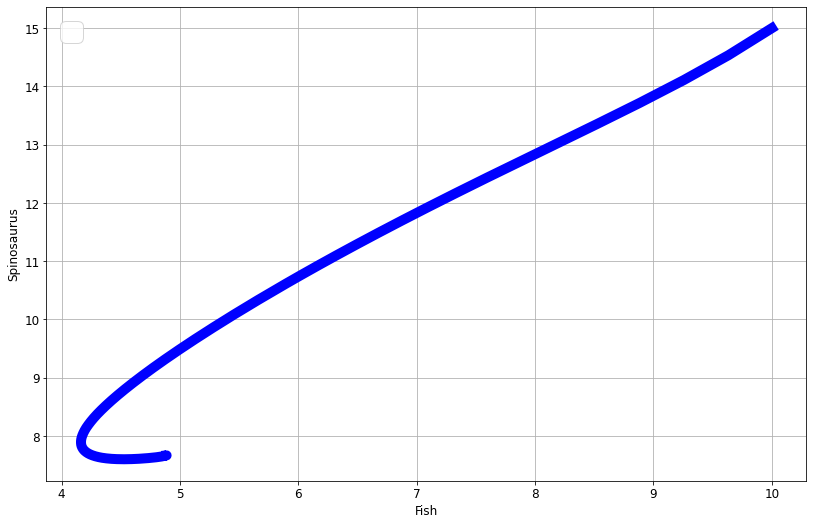

In [48]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


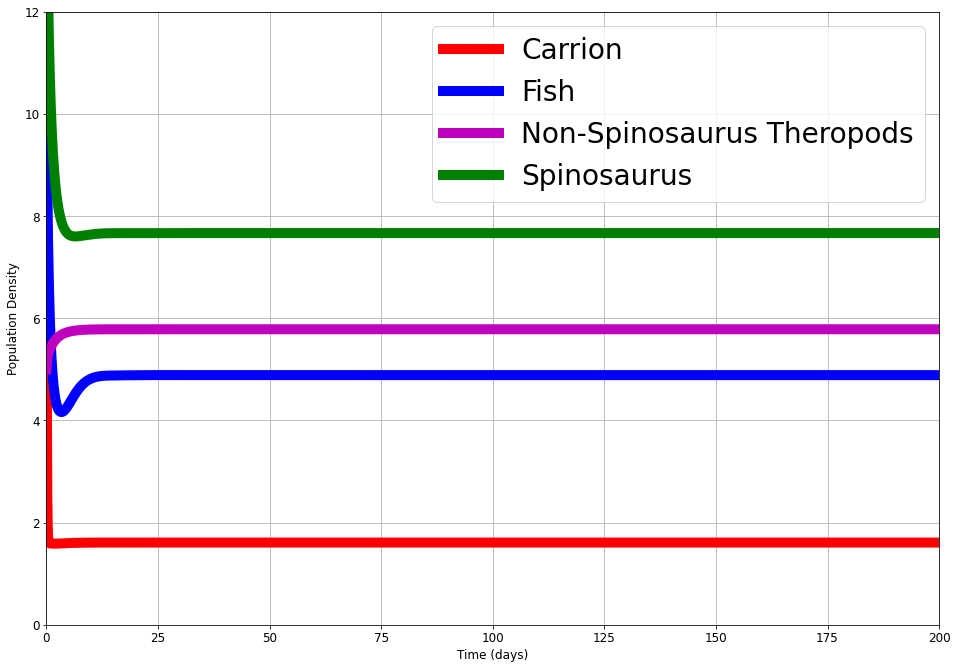

In [49]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# Addition of the Crocodylomorpha functional group 

# Exponential Density-Mediated Interaction

## Parameter values

In [50]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1
a_R=1
h_R=1
m_R=0.1
q_R=0.1

y0 = np.array([10, 10, 5, 15, 5])

In [51]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    C, F, T, S, R = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_R * F * R / ( 1 + a_R * h_R * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    R_prime = ( a_R * F * R ) / ( 1 + a_R * h_R * F ) - m_R * R - q_R * R**2
    return C_prime, F_prime, T_prime, S_prime, R_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S,a_R,h_R,m_R,q_R),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [52]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S, a_R=a_R, h_R=h_R, m_R=m_R, q_R=q_R)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus, Crocodylomorpha = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


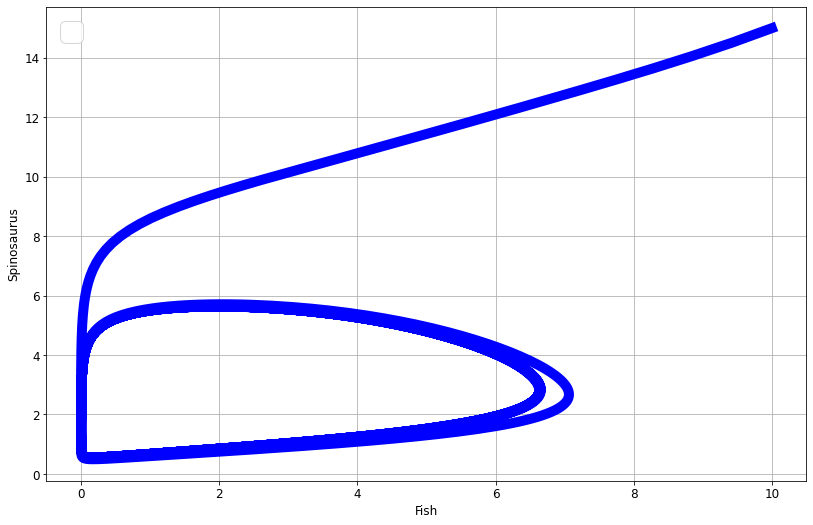

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

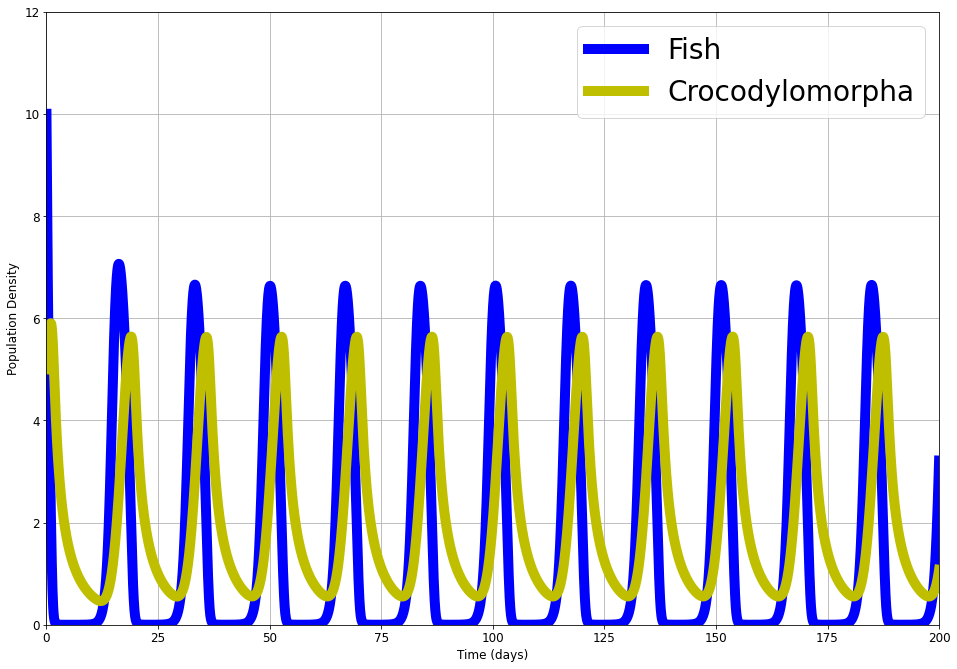

In [54]:
fig, ax = plt.subplots(figsize=(14, 10))

#ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
#ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
#ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")
ax.plot(time_list, Crocodylomorpha, label="Crocodylomorpha", linestyle="-", linewidth=10, markersize=12,color="y")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

#plt.savefig('img/exponential_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# No density-mediated interaction

## Parameter values

In [55]:
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1
a_R=1
h_R=1
m_R=0.1
q_R=0.1

y0 = np.array([10, 10, 5, 15, 5])

In [56]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    C, F, T, S, R = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_R * F * R / ( 1 + a_R * h_R * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    R_prime = ( a_R * F * R ) / ( 1 + a_R * h_R * F ) - m_R * R - q_R * R**2
    return C_prime, F_prime, T_prime, S_prime, R_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
    a_R=a_R,
    h_R=h_R,
    m_R=m_R,
    q_R=q_R,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S,a_R,h_R,m_R,q_R),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [57]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S, a_R=a_R, h_R=h_R, m_R=m_R, q_R=q_R)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus, Crocodylomorpha = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


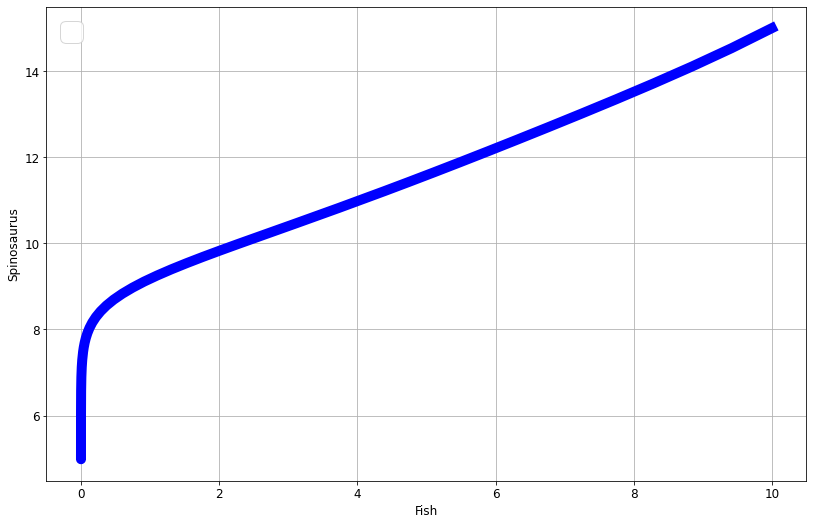

In [58]:
plt.rcParams['lines.linewidth'] = 30
plt.rcParams.update({'font.size': 28})

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

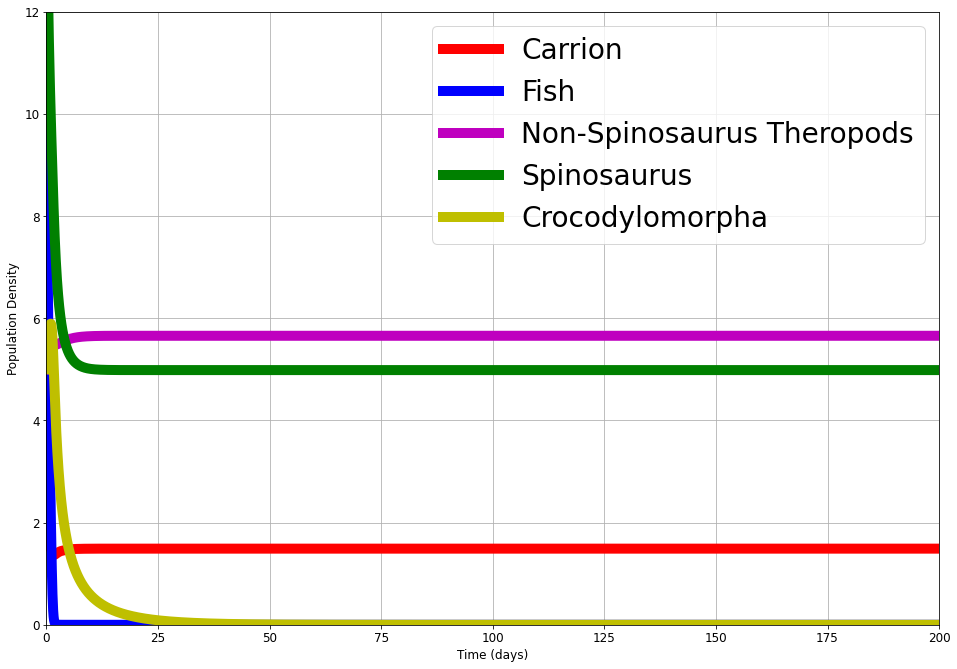

In [59]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")
ax.plot(time_list, Crocodylomorpha, label="Crocodylomorpha", linestyle="-", linewidth=10, markersize=12,color="y")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

#plt.savefig('img/No_density_mediated_evolution.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Sauropods and others 

## Exponential Density-Mediated Interaction

## Parameter values

In [60]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 10, 5, 15])

In [61]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [62]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


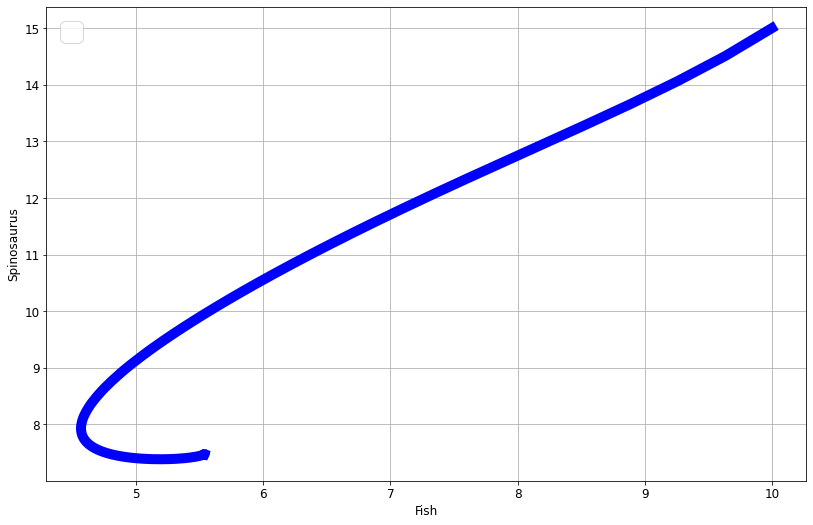

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


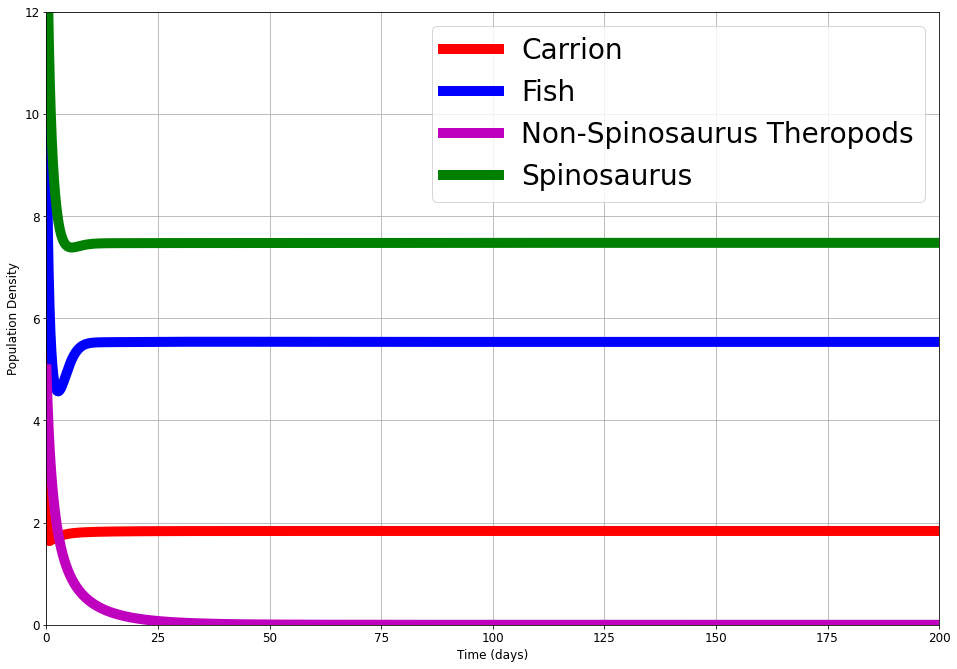

In [64]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_O.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [65]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [66]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


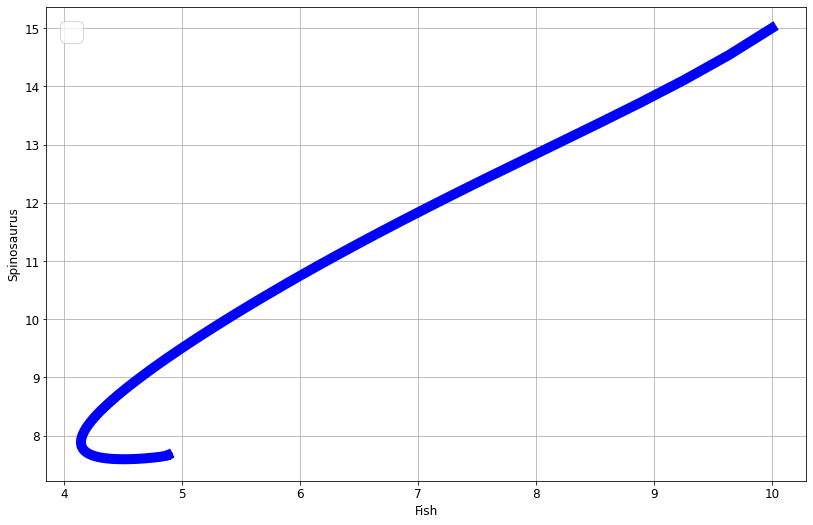

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


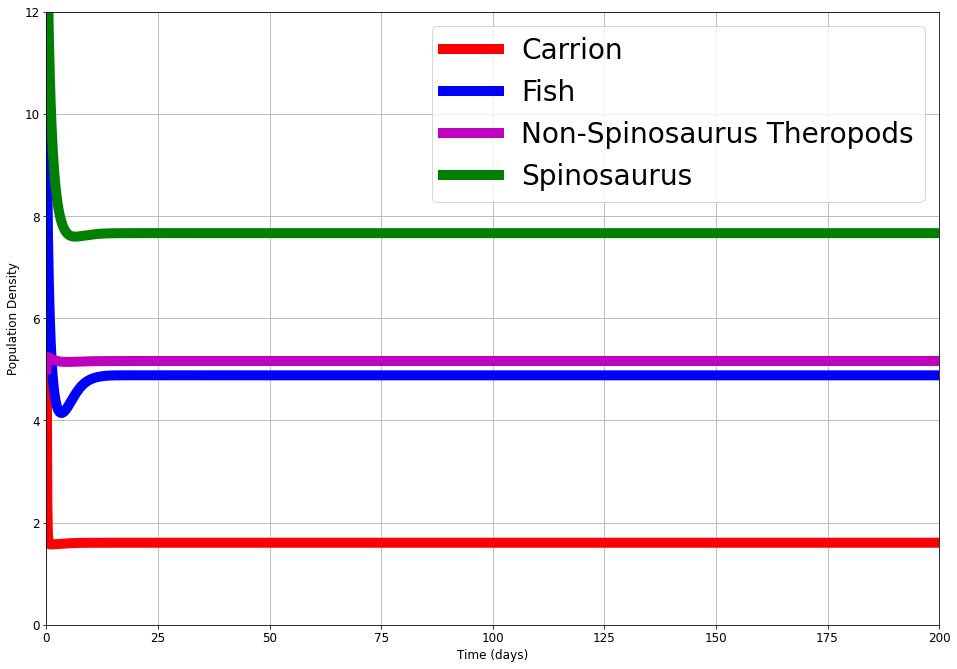

In [68]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_O.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Fishes

## Exponential Density-Mediated Interaction

## Parameter values

In [69]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0.5
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 0, 5, 15])

In [70]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [71]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


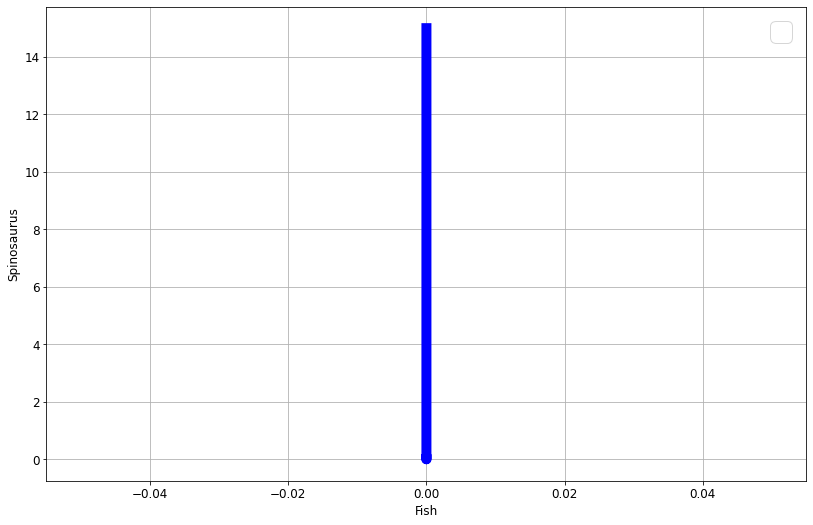

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


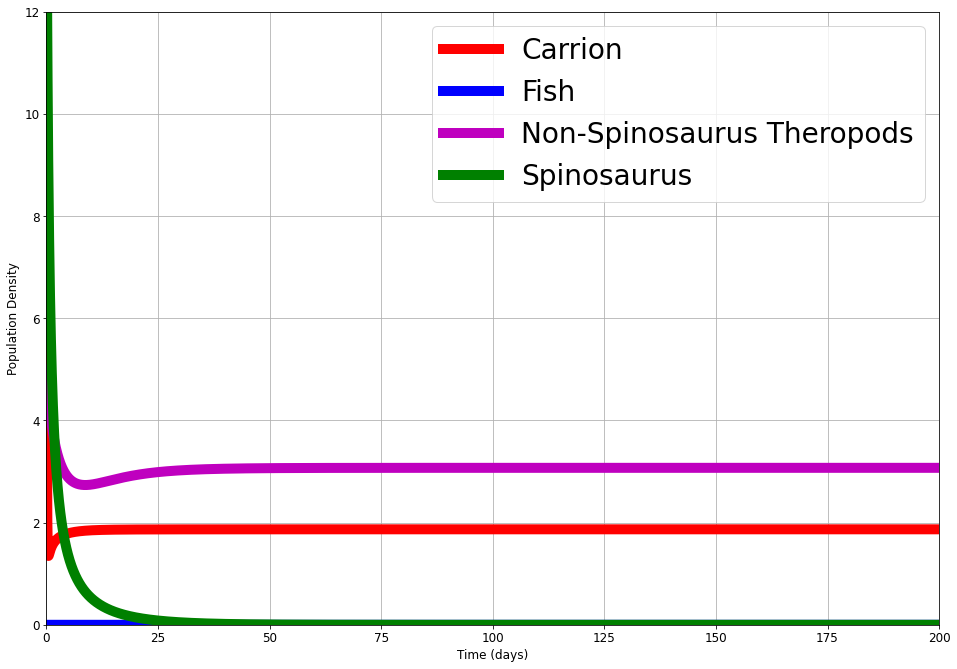

In [73]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_F.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [74]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [75]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


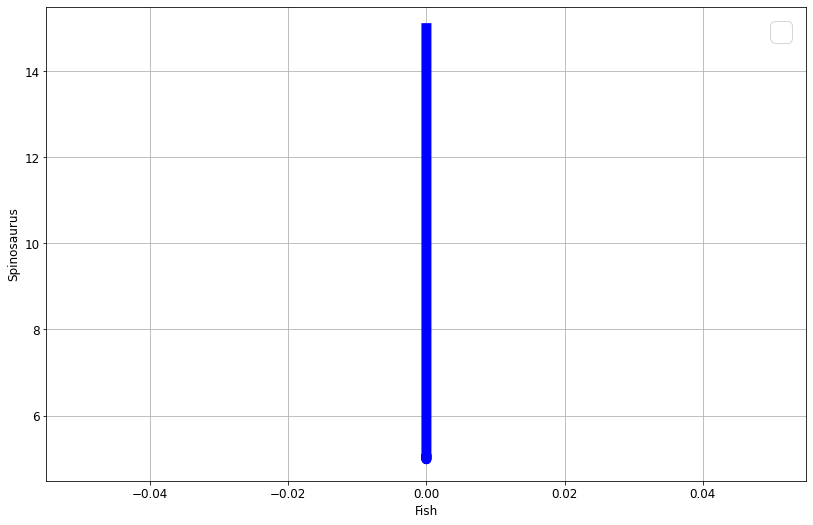

In [76]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


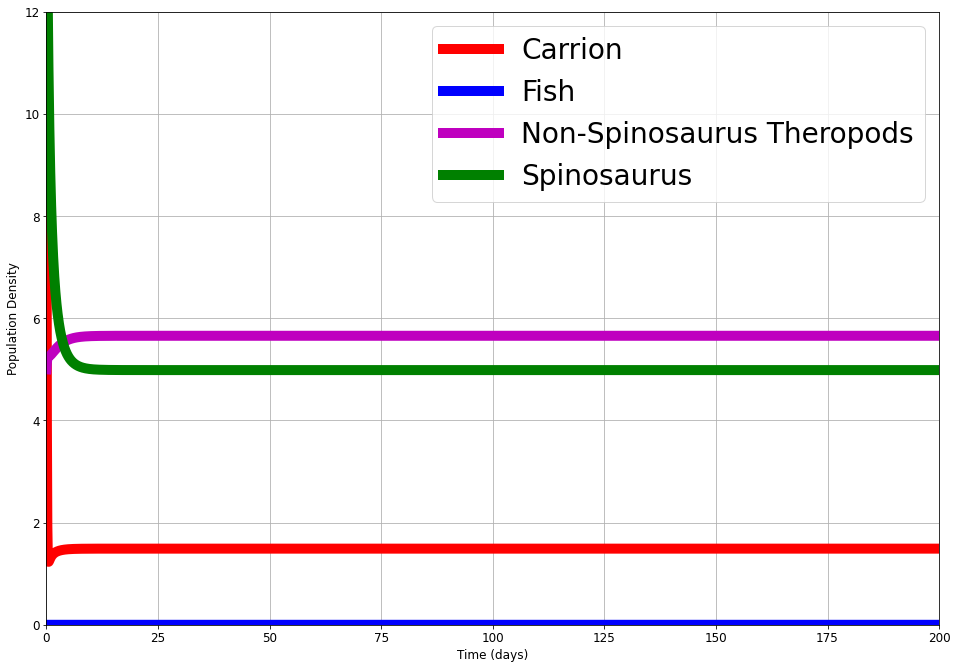

In [77]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_F.eps', format='eps')
plt.tight_layout()
plt.show()

# Absence of Fishes and Sauropods and others 

## Exponential Density-Mediated Interaction

## Parameter values

In [78]:
lambda_T=0.1
lambda_S=0.01
alpha=1
beta=100
p=20
d=10
a_S=1
h_S=1
a_T=1
h_T=1
O=0
r_F=2
K_F=10
m_T=0.1
q_T=0.1
m_S=0.1
q_S=0.1

y0 = np.array([10, 0, 5, 15])

In [79]:
def model_exponential_density_mediated(
    t,
    X,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = lambda_T * np.exp( - alpha * S )
    aST = lambda_S * np.exp ( - beta * T )
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_exponential_density_mediated(
    y0,
    t_span,
    t_eval,
    lambda_T=lambda_T,
    lambda_S=lambda_S,
    alpha=alpha,
    beta=beta,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_exponential_density_mediated = solve_ivp(
        fun=model_exponential_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(lambda_T,lambda_S,alpha,beta,p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_exponential_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [80]:
solution_ODE_exponential_density_mediated = ode_solver_exponential_density_mediated(y0,(t0, tf + days_to_forecast),time_list,lambda_T=lambda_T, lambda_S=lambda_S, alpha=alpha, beta=beta, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_exponential_density_mediated, y_computed_exponential_density_mediated = solution_ODE_exponential_density_mediated.t, solution_ODE_exponential_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_exponential_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


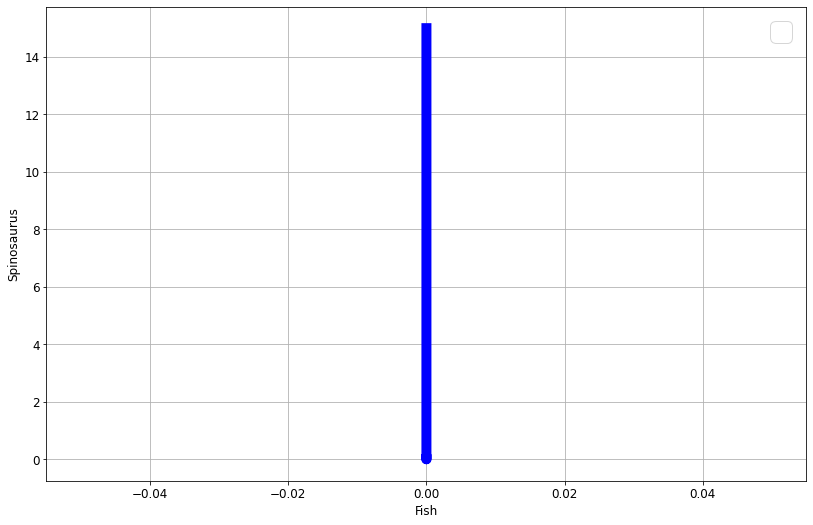

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


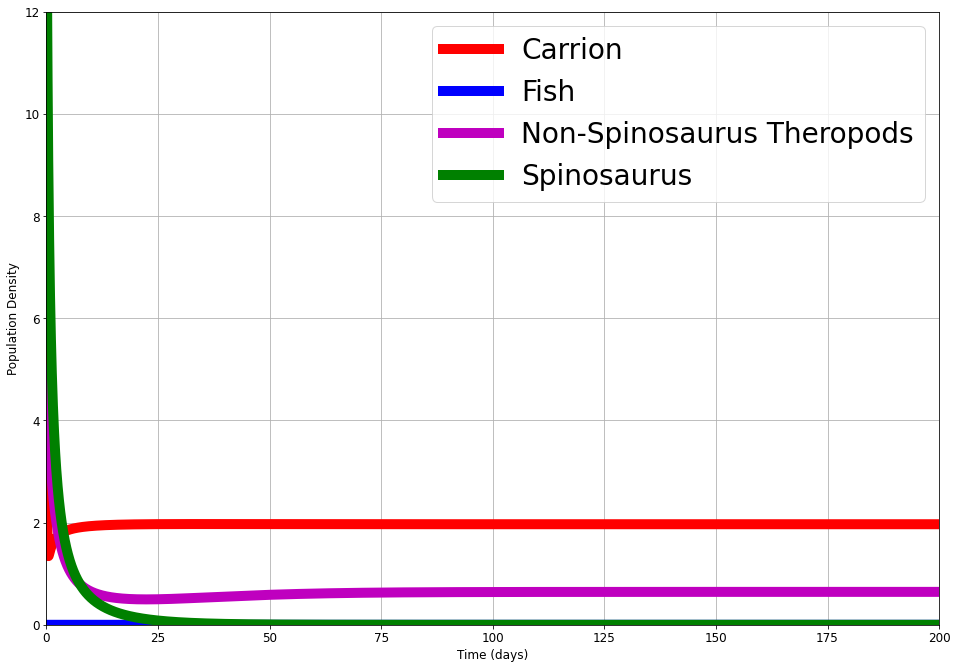

In [82]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/exponential_density_mediated_evolution_free_FO.eps', format='eps')
plt.tight_layout()
plt.show()

## No density-mediated interaction

In [83]:
def model_No_density_mediated(
    t,
    X,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    C, F, T, S = X
    aTS = a_T
    aST = a_S
    C_prime = p - d * C - a_S * C * S / ( 1 + a_S * h_S * C + a_S * h_S * F ) - a_T * C * T / ( 1 + a_T * h_T * C + a_T * h_T + O )
    F_prime = 0#r_F * F * ( 1 - F / K_F ) - a_S * F * S / ( 1 + a_S * h_S * C + a_S * h_S * F )
    T_prime = ( aTS * C * T + a_T * O * T ) / ( 1 + aTS * h_T * C + a_T * h_T * O ) - m_T * T - q_T * T**2
    S_prime = ( aST * C * S + a_S * F * S ) / ( 1 + aST * h_S * C + a_S * h_S * F ) - m_S * S - q_S * S**2
    return C_prime, F_prime, T_prime, S_prime

def ode_solver_No_density_mediated(
    y0,
    t_span,
    t_eval,
    p=p,
    d=d,
    a_S=a_S,
    h_S=h_S,
    a_T=a_T,
    h_T=h_T,
    O=O,
    r_F=r_F,
    K_F=K_F,
    m_T=m_T,
    q_T=q_T,
    m_S=m_S,
    q_S=q_S,
):
    solution_ODE_No_density_mediated = solve_ivp(
        fun=model_No_density_mediated,
        t_span=t_span,
        y0=y0,
        t_eval=t_eval,
        args=(p,d,a_S,h_S,a_T,h_T,O,r_F,K_F,m_T,q_T,m_S,q_S),
        method=method,
    )
    return solution_ODE_No_density_mediated

t0 = time_list.min()
tf = time_list.max()
days_to_forecast = 0

In [84]:
solution_ODE_No_density_mediated = ode_solver_No_density_mediated(y0,(t0, tf + days_to_forecast),time_list, p=p, d=d, a_S=a_S, h_S=h_S, a_T=a_T, h_T=h_T, O=O, r_F=r_F, K_F=K_F, m_T=m_T, q_T=q_T, m_S=m_S, q_S=q_S)
t_computed_No_density_mediated, y_computed_No_density_mediated = solution_ODE_No_density_mediated.t, solution_ODE_No_density_mediated.y
Carrion, Fish, Other_Theropods, Spinosaurus = y_computed_No_density_mediated

No handles with labels found to put in legend.
No handles with labels found to put in legend.


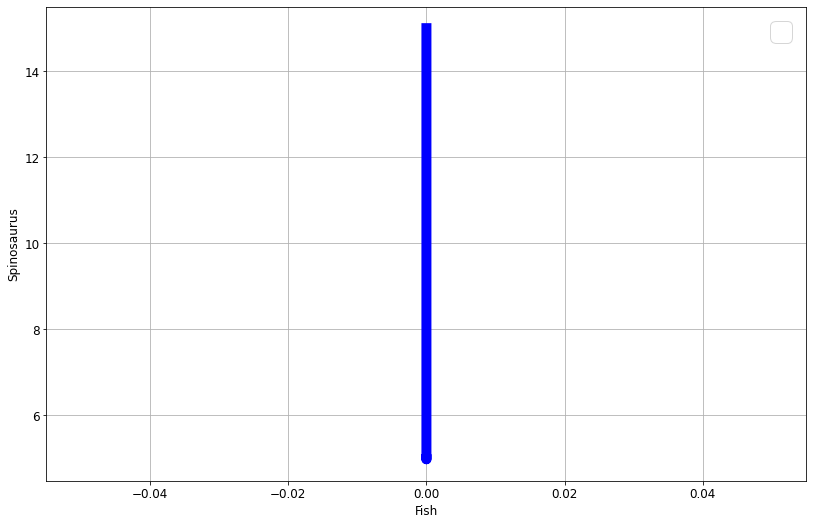

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(Fish, Spinosaurus, linestyle="-", linewidth=10, markersize=12,color="b")

plt.xlabel("Fish")
plt.ylabel("Spinosaurus")
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.tight_layout()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


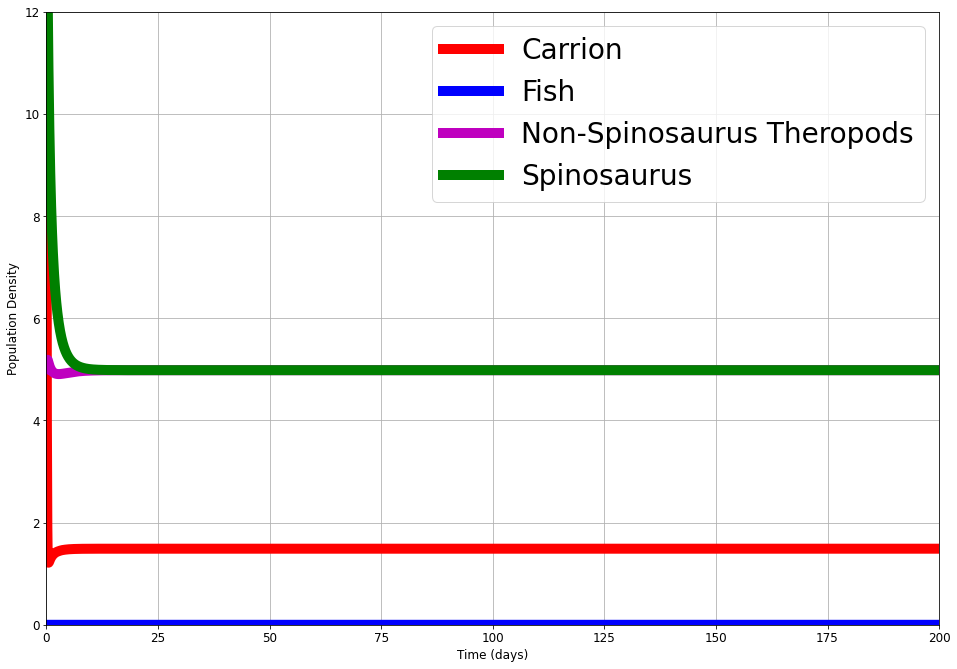

In [86]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(time_list, Carrion, label="Carrion", linestyle="-", linewidth=10, markersize=12,color="r")
ax.plot(time_list, Fish, label="Fish", linestyle="-", linewidth=10, markersize=12,color="b")
ax.plot(time_list, Other_Theropods, label="Non-Spinosaurus Theropods", linestyle="-", linewidth=10, markersize=12,color="m")
ax.plot(time_list, Spinosaurus, label="Spinosaurus", linestyle="-", linewidth=10, markersize=12,color="g")

plt.xlabel("Time (days)")
plt.ylabel("Population Density")
plt.legend(fancybox=True, shadow=True)
plt.xlim([0, time_list[-1]])
plt.ylim([0, 12])
plt.grid()
plt.rcParams.update({'font.size': 30})
leg = ax.legend(prop={"size":28})

plt.savefig('img/No_density_mediated_evolution_free_FO.eps', format='eps')
plt.tight_layout()
plt.show()